# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

**Team 4** confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

    

In this section we will import and discuss, the libraries that will be used throughout the analysis and modelling. 

---

In [76]:
# Libraries for data loading, data manipulation and data visulisation
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
import seaborn as sns

# Libraries for data preparation and model building
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.graphics.correlation import plot_corr
from scipy import stats
from sklearn.preprocessing import StandardScaler 

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


 In this section we will load the data from the `df_train` file into a DataFrame. 



In [2]:
df = pd.read_csv("df_train.csv")
pd.set_option('display.max_columns', None)
df.head(5)

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


    
In this section, we will perform an in-depth analysis of all the variables in the DataFrame.

We will look at:

- Categorical and numerical features
- features with null values
- features that have negative values
- Graphical and non graphical representaion of outliers
- Interactions of the features
- Distributions of the features
- features with 0.0 values

### Data frame anaylsis

We will look at the method df.infor. This will provide us with information about the data types of the variables, the number of varibles and the non-null count for each variable.

In [3]:
# look at data statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

Above we observe that there are features that contain non-numerical values. These are __*Time*, *Valencia_wind_deg*__ and __*Seville_pressure*__


We will also look at the function df.isnull().sum(). This will give us information about which variables have null values.

In [4]:
df.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

Above we can see that __*Valencia_pressure*__ has 2068 Null values and we are going to fill the missing values using the "fillna" fuction. We also are going to remove the *__"Unnamed: 0"__* feature because it is redundant (We do not need it). 

We can observe the description of the dataset by using the method df.describe().

In [5]:
df.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8.763000e+03,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,6695.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,2.870497,190.544848,19.473392,2.425045,0.128906,0.039439,0.031912,1.377965e+03,0.000243,0.037818,0.000439,0.000205,773.527594,765.979687,1017.739549,774.658818,1012.051407,297.479527,1010.316920,291.337233,290.592152,724.722362,293.978903,65.247727,289.867648,291.157644,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,1.792197,89.077337,28.053660,1.672895,0.634730,0.175857,0.557264,1.407314e+04,0.003660,0.152639,0.003994,0.011866,77.313315,88.142235,10.046124,71.940009,9.506214,8.875812,22.198555,7.565692,7.162274,115.846537,7.920986,19.262322,6.907402,7.273538,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.706667e+02,0.000000,0.000000,0.000000,0.000000,211.000000,200.666667,971.333333,200.000000,972.666667,272.063000,927.666667,269.888000,269.888000,207.333333,272.063000,10.333333,269.888000,272.150000,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,1.666667,118.166667,0.000000,1.000000,0.000000,0.000000,0.000000,1.014000e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.000000,1013.000000,800.000000,1010.333333,291.312750,1012.333333,285.550167,285.150000,700.333333,288.282917,51.333333,284.783333,285.483333,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,2.666667,200.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.018000e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.333333,1019.000000,800.000000,1015.000000,297.101667,1017.333333,291.037000,290.176667,800.000000,293.323333,67.000000,289.550000,290.150000,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,4.000000,260.000000,33.333333,3.333333,0.000000,0.000000,0.000000,1.022000e+03,0.000000,0.000000,0.000000,0.000000,800.666667,801.000000,1024.000000,800.000000,1018.000000,304.150000,1022.00

We obsserve  that __*load_shortfall_3h*__ has negative values the lowest being -6618.

We believe that the Load Short Fall is the difference between the power generation through fossil fuel and renewable energy sources. The negative values of the Load Short Fall could mean that the fossil fuel is doing better than renewable energy in generating electricity and positive values could mean that renewable energy is doing well compared to fossil fuel.


Standard deviation a measure of average distance from the mean. It is used to measure of how dispersed the data is in relation to the mean.We can use coefficient of variation (CV) to measure how spread out values are in a dataset relative to the mean. The CV is a ratio between the standard deviation and the mean.The higher the CV, the higher the standard deviation relative to the mean. In general, a CV value greater than 1 is often considered high.

In [6]:
CV=abs(df.std(axis = 0))/abs(df.mean(axis = 0))


print(CV)

Unnamed: 0               0.577449
Madrid_wind_speed        0.762810
Bilbao_rain_1h           2.761647
Valencia_wind_speed      0.932303
Seville_humidity         0.361022
Madrid_humidity          0.423853
Bilbao_clouds_all        0.748831
Bilbao_wind_speed        0.916520
Seville_clouds_all       1.769809
Bilbao_wind_deg          0.642035
Barcelona_wind_speed     0.624351
Barcelona_wind_deg       0.467488
Madrid_clouds_all        1.440615
Seville_wind_speed       0.689841
Barcelona_rain_1h        4.923986
Seville_rain_1h          4.459006
Bilbao_snow_3h          17.462507
Barcelona_pressure      10.212992
Seville_rain_3h         15.088844
Madrid_rain_1h           4.036128
Barcelona_rain_3h        9.088357
Valencia_snow_3h        57.766503
Madrid_weather_id        0.099949
Barcelona_weather_id     0.115071
Bilbao_pressure          0.009871
Seville_weather_id       0.092867
Valencia_pressure        0.009393
Seville_temp_max         0.029837
Madrid_pressure          0.021972
Valencia_temp_

From the calculation of the CV. We observe that the following variables have high CVs. This means that these variables have a greater level of dispersion around the mean

-  Bilbao_rain_1h           
-  Seville_clouds_all       
-  Madrid_clouds_all        
-  Barcelona_rain_1h
-  Seville_rain_1h
-  Bilbao_snow_3h
-  Barcelona_pressure
-  Seville_rain_3h
-  Valencia_snow_3h

The highest CV is from the feature Valencia_snow_3h with a CV of 58. Bilbao_snow_3h has the second highest CV with 17.

### Distribution and Skewness

Skewed data means that there is a a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution. If our data is too skewed then our model may not work because the tail region may act as outlier of the statistical model. It will be necessary to transform the skewed data to a close enough normal distribution for our moodel to work.

If the skewness is between -0.5 and 0.5, the data is fairly symmetrical. If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data is moderately skewed. If the skewness is less than -1 or greater than 1, the data are highly skewed.

In [7]:
#skewness
df.skew()

Unnamed: 0               0.000000
Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_

The following variables have skewness values that are great and less than 1. The distributions of the following these variables are highly skewed.

- Madrid_wind_speed      
- Bilbao_rain_1h           
- Valencia_wind_speed      
- Bilbao_wind_speed        
- Seville_clouds_all       
- Barcelona_wind_speed     
- Madrid_clouds_all        
- Seville_wind_speed       
- Barcelona_rain_1h        
- Seville_rain_1h          
- Bilbao_snow_3h          
- Barcelona_pressure      
- Seville_rain_3h         
- Madrid_rain_1h           
- Barcelona_rain_3h       
- Valencia_snow_3h        
- Madrid_weather_id       
- Barcelona_weather_id    
- Seville_weather_id      
- Valencia_pressure       
- Madrid_pressure         
- Bilbao_weather_id   

*Histogram plots*


We can observe the distributions of the variables by looking at their respective histograms and barplots. We can detect the skewness of the variables with these plots.

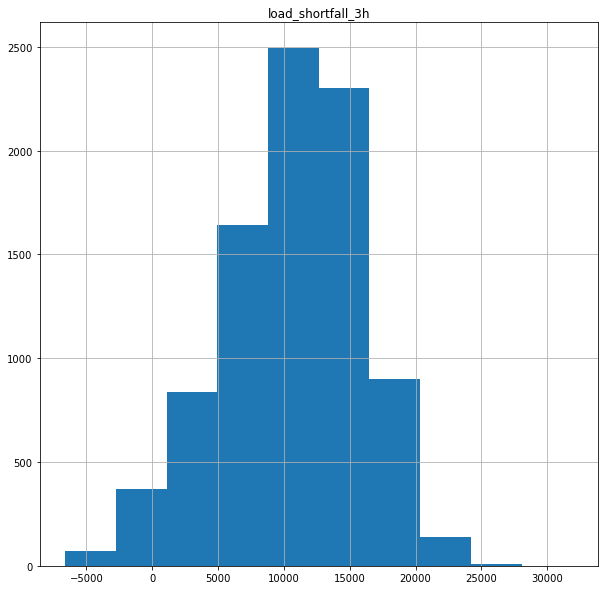

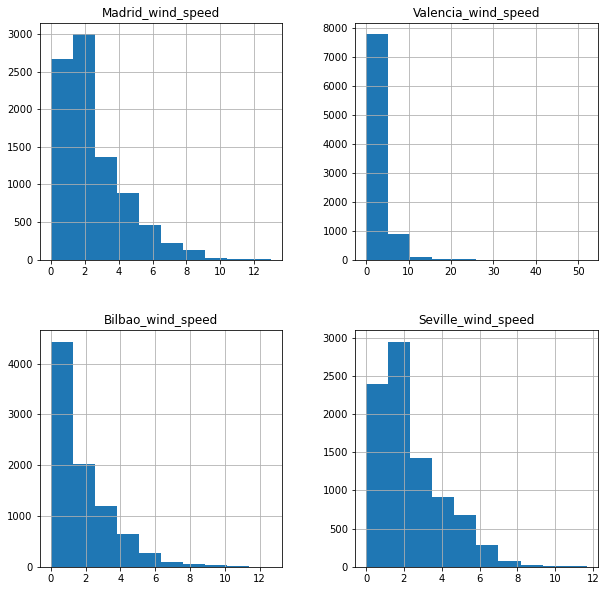

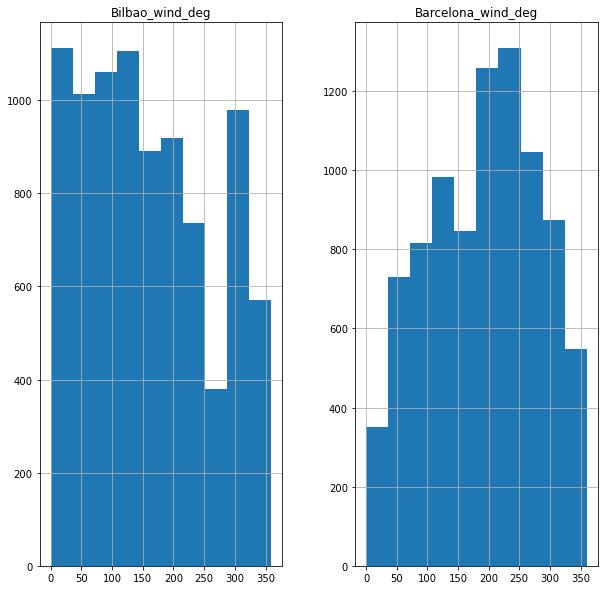

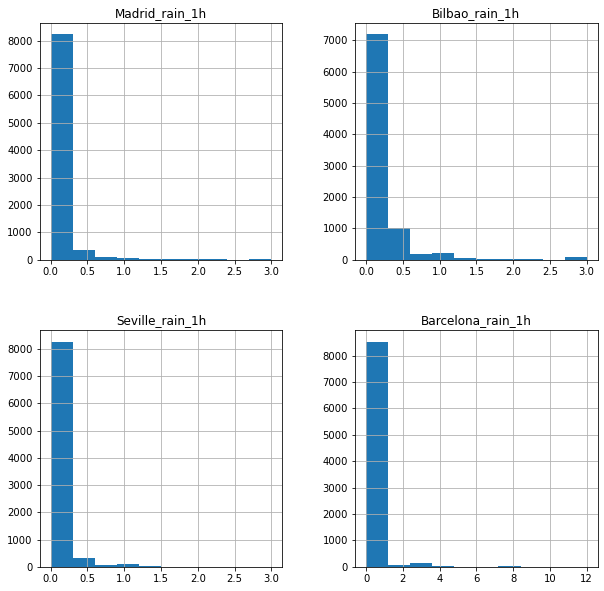

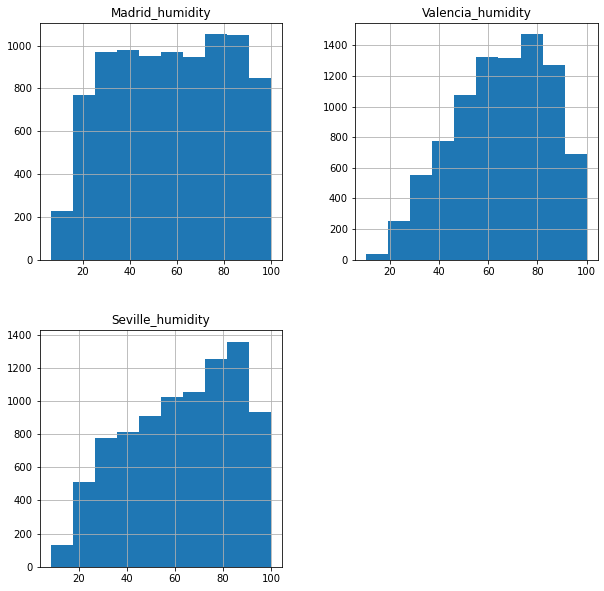

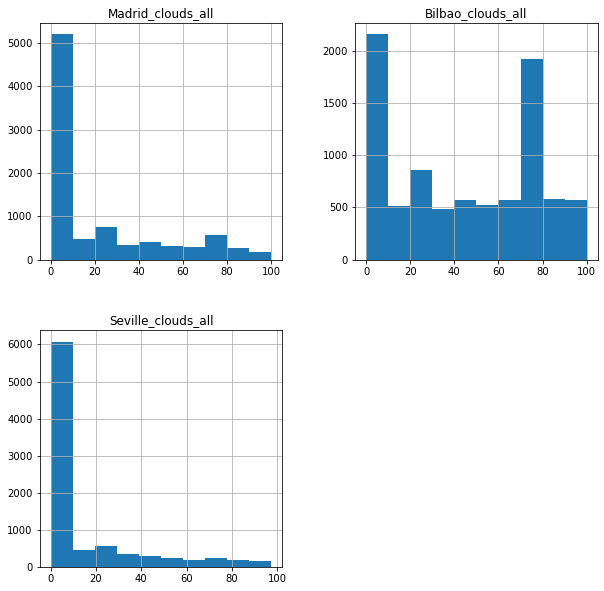

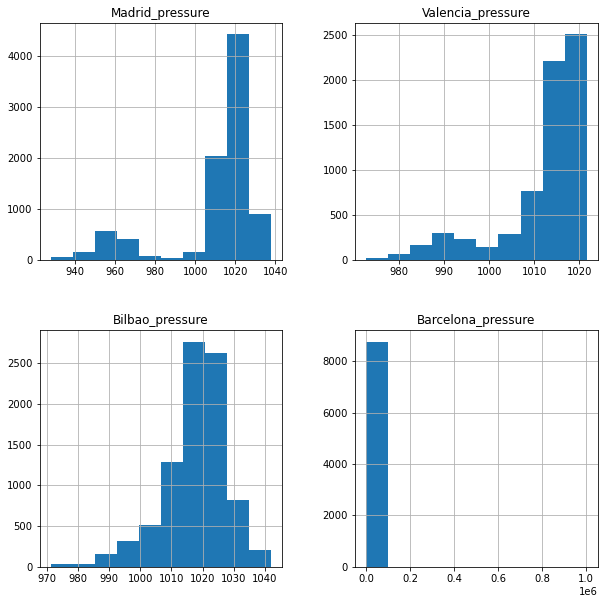

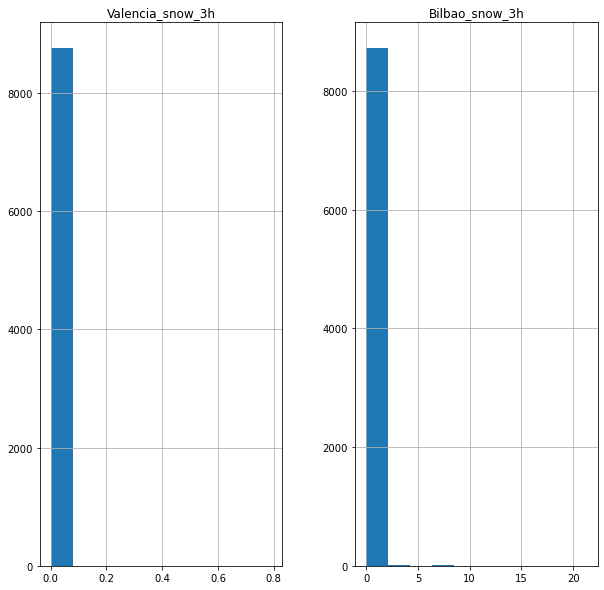

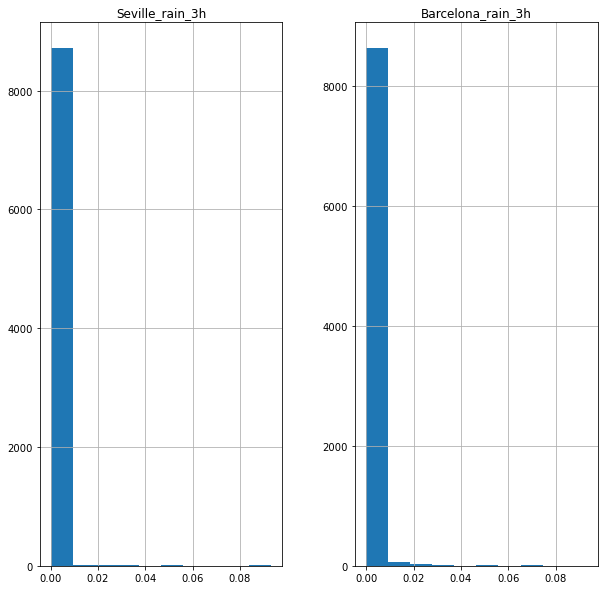

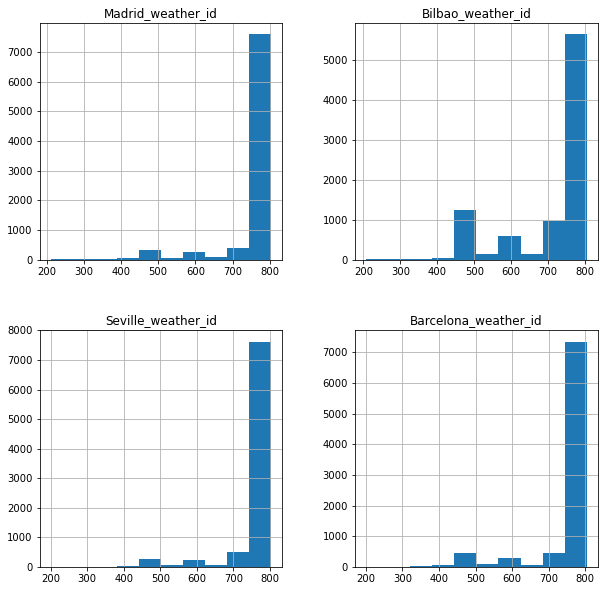

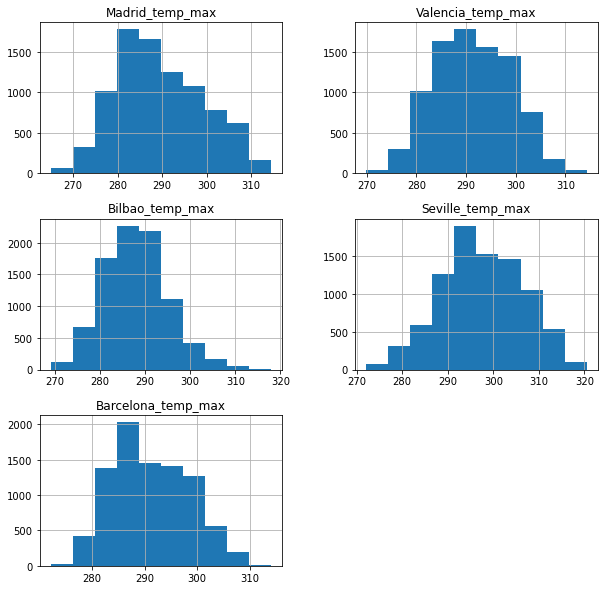

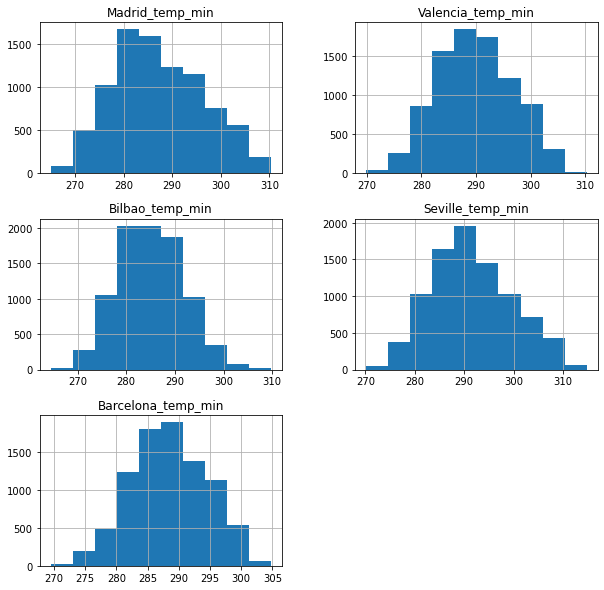

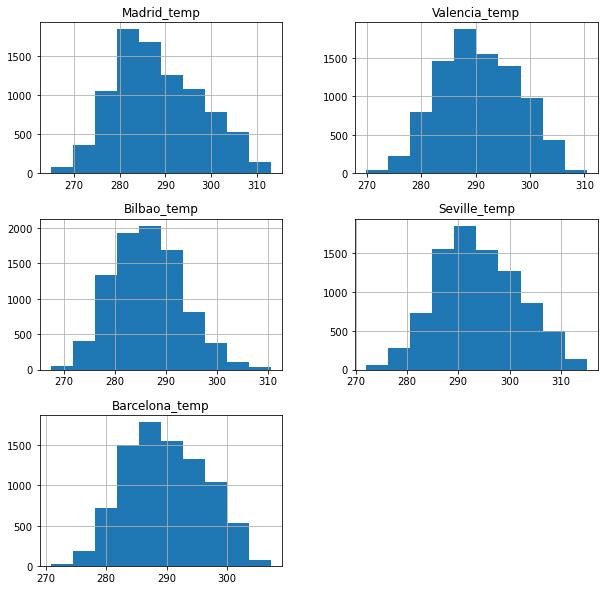

In [8]:
#histograms for Numerical data

#dependent variable
features_load_shortfall_3h = ['load_shortfall_3h']  # create a histogram for the y variable 
df[features_load_shortfall_3h].hist(figsize=(10,10), bins=10);

# wind speed
features_wind_speed = ['Madrid_wind_speed', 'Valencia_wind_speed', 'Bilbao_wind_speed', 'Seville_wind_speed'] # create a list of all numerical features(wind_speed)
df[features_wind_speed].hist(figsize=(10,10), bins=10);
    
                             
# wind degrees
features_wind_speed = ['Bilbao_wind_deg', 'Barcelona_wind_deg'] # create a list of all numerical features(wind_speed)
df[features_wind_speed].hist(figsize=(10,10), bins=10);                             
                      
                             
#rain_1hr
features_rain_1h = ['Madrid_rain_1h', 'Bilbao_rain_1h','Seville_rain_1h','Barcelona_rain_1h'] # create a list of all numerical features (rain_1h)
df[features_rain_1h].hist(figsize=(10,10), bins=10);   
                             
                          
#humidity
features_humidity = ['Madrid_humidity', 'Valencia_humidity', 'Seville_humidity'] # create a list of all numerical features (humidity)
df[features_humidity].hist(figsize=(10,10));
                                                         

#clouds
features_clouds_all = ['Madrid_clouds_all', 'Bilbao_clouds_all', 'Seville_clouds_all'] # create a list of all numerical features(clouds_all)
df[features_clouds_all].hist(figsize=(10,10));
                             
                             
#pressure
features_clouds_all = ['Madrid_pressure', 'Valencia_pressure', 'Bilbao_pressure', 'Seville_pressure', 'Barcelona_pressure'] # create a list of all numerical features(clouds_all)
df[features_clouds_all].hist(figsize=(10,10));                             
                           
#snow_3h
features_clouds_all = ['Valencia_snow_3h', 'Bilbao_snow_3h'] # create a list of all numerical features(clouds_all)
df[features_clouds_all].hist(figsize=(10,10));

#rain_3h
features_clouds_all = ['Seville_rain_3h', 'Barcelona_rain_3h'] # create a list of all numerical features(clouds_all)
df[features_clouds_all].hist(figsize=(10,10));
                             
                             
#weather_id
features_clouds_all = ['Madrid_weather_id', 'Bilbao_weather_id', 'Seville_weather_id', 'Barcelona_weather_id'] # create a list of all numerical features(clouds_all)
df[features_clouds_all].hist(figsize=(10,10));                             
                           
#temp_max                             
features_temp_max = ['Madrid_temp_max', 'Valencia_temp_max', 'Bilbao_temp_max', 'Seville_temp_max', 'Barcelona_temp_max'] # create a list of all numerical features (temp_max)
df[features_temp_max].hist(figsize=(10,10), bins=10);

#temp_max                             
features_temp_max = ['Madrid_temp_min', 'Valencia_temp_min', 'Bilbao_temp_min', 'Seville_temp_min', 'Barcelona_temp_min'] # create a list of all numerical features (temp_max)
df[features_temp_max].hist(figsize=(10,10), bins=10);                          
                     
#temp                            
features_temp_max = ['Madrid_temp', 'Valencia_temp', 'Bilbao_temp', 'Seville_temp', 'Barcelona_temp'] # create a list of all numerical features (temp_max)
df[features_temp_max].hist(figsize=(10,10), bins=10);
                             

We can observe from the graphs above that the following variables have  0.0 values (skewed to the left)
- Barcelona_pressure
- Valencia_snow_3h
- Bilbao_snow_3h
- Seville_rain_3h

The following variables have alot of 0.0 value (skewed to the left)
- Seville_rain_1h','Barcelona_rain_1h
- Seville_rain_1h','Barcelona_rain_1h

<AxesSubplot:xlabel='Seville_pressure', ylabel='count'>

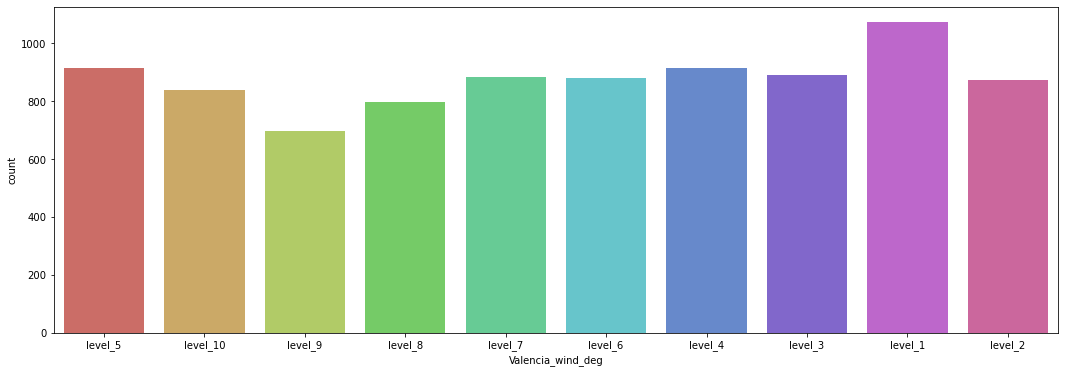

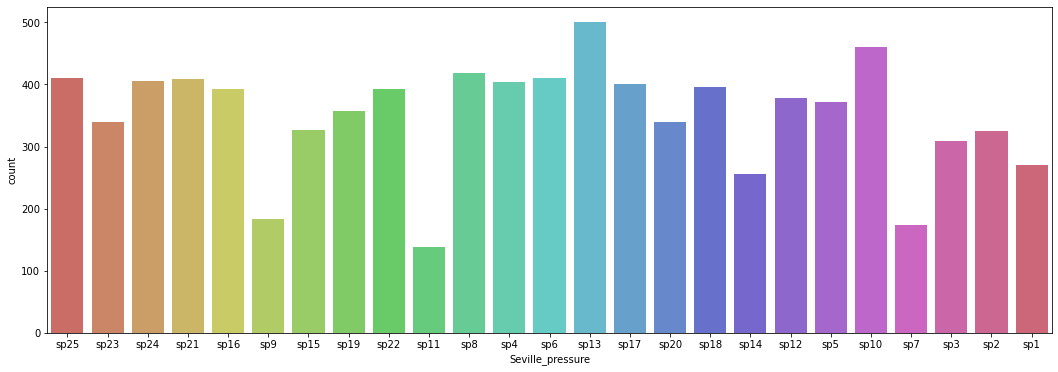

In [5]:
#categorical bar plots

#wind_deg
fig_dims = (18, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x = 'Valencia_wind_deg', data = df, palette="hls")

#Seville_pressure
fig_dims = (18, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x = 'Seville_pressure', data = df, palette="hls")

From observation it seem that the distributions of 'Valencia_wind_deg'(categorical) is similar to the distributions of the numerical variables 'Bilbao_wind_deg' and 'Barcelona_wind_deg'.

The distribution of 'Seville_pressure (categorical) is also similar to the other numerical pressure variables 'Madrid_pressure', 'Valencia_pressure', 'Bilbao_pressure' and 'Seville_pressure'

We could possibly use the numerical variables to estimate the categorical variables.

### Outliers

Kurtosis can be used to detect outliers. We expect a kurtosis value to be between [3,-3]. If the number is greater than 3 it means there is a huge number of outliers.


In [6]:
#kurtosis
df.kurtosis()

Unnamed: 0                -1.200000
Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0

From the ananlysis above we can observe that the following variables have a kurtosis value larger than 3.

- Bilbao_rain_1h            
- Valencia_wind_speed       
- Bilbao_wind_speed          
- Barcelona_rain_1h        
- Seville_rain_1h           
- Bilbao_snow_3h           
- Barcelona_pressure      
- Seville_rain_3h          
- Madrid_rain_1h            
- Barcelona_rain_3h        
- Valencia_snow_3h        
- Madrid_weather_id          
- Barcelona_weather_id       
- Seville_weather_id        
- Valencia_pressure          

We can use the boxplot and scatter plot to graphically see if we have and outliers in our data.If there is an outlier it will plotted as point in boxplot but other population will be grouped together and display as boxes.

The black dots in the graphs below represent the outliers for each of the variables.

<AxesSubplot:>

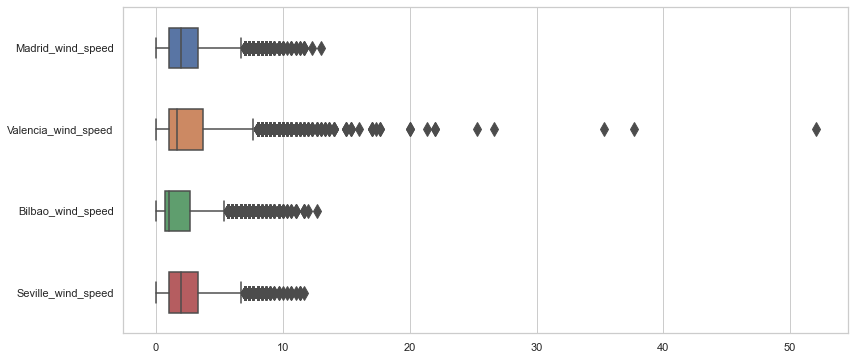

In [8]:
#wind speed
selected_columns = df[ [ 'Madrid_wind_speed', 'Valencia_wind_speed', 'Bilbao_wind_speed', 'Seville_wind_speed' ] ]
df_wind_speed = selected_columns.copy() 

sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(13,6))
sns.boxplot(data=df_wind_speed,orient="h",width=0.5, fliersize=10)

<AxesSubplot:>

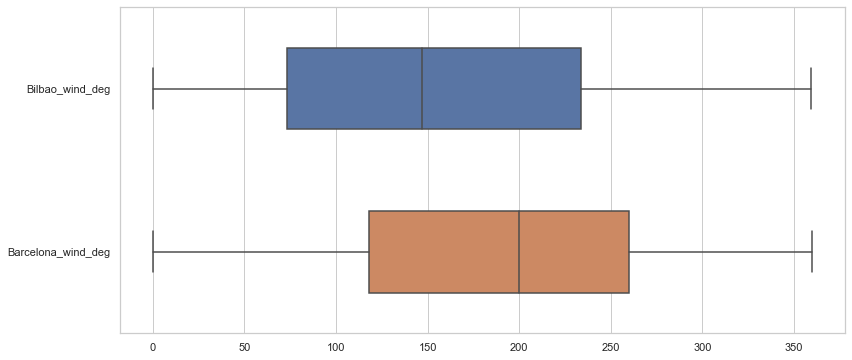

In [9]:
#wind speed
selected_columns = df[ [ 'Bilbao_wind_deg', 'Barcelona_wind_deg'] ]
df_wind_deg = selected_columns.copy() 

sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(13,6))
sns.boxplot(data=df_wind_deg,orient="h",width=0.5, fliersize=10)

<AxesSubplot:>

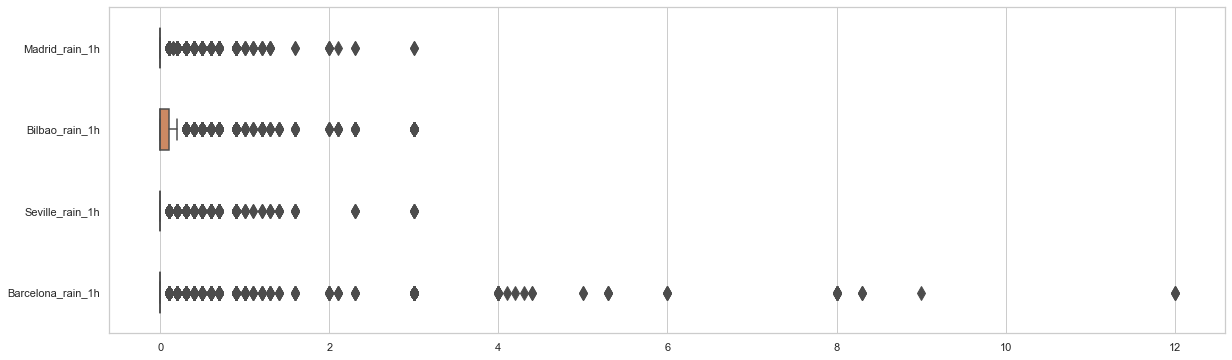

In [10]:
#rain_1h
selected_columns = df[ ['Madrid_rain_1h', 'Bilbao_rain_1h','Seville_rain_1h','Barcelona_rain_1h'] ]
df_rain_1h = selected_columns.copy() 



sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(20,6))
sns.boxplot(data=df_rain_1h,orient="h",width=0.5, fliersize=10)

<AxesSubplot:>

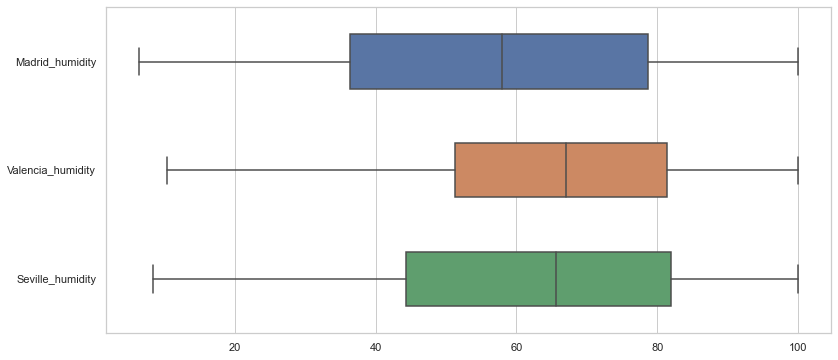

In [11]:
#humidity
selected_columns = df[ ['Madrid_humidity', 'Valencia_humidity', 'Seville_humidity'] ]
df_humidity = selected_columns.copy() 

sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(13,6))
sns.boxplot(data=df_humidity,orient="h",width=0.5, fliersize=10)

<AxesSubplot:>

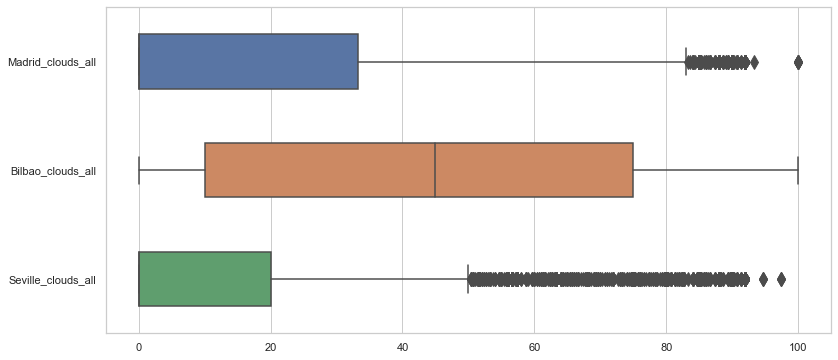

In [12]:
#clouds_all
selected_columns = df[ ['Madrid_clouds_all', 'Bilbao_clouds_all', 'Seville_clouds_all'] ]
df_clouds_all = selected_columns.copy() 

sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(13,6))
sns.boxplot(data=df_clouds_all,orient="h",width=0.5, fliersize=10)

<AxesSubplot:>

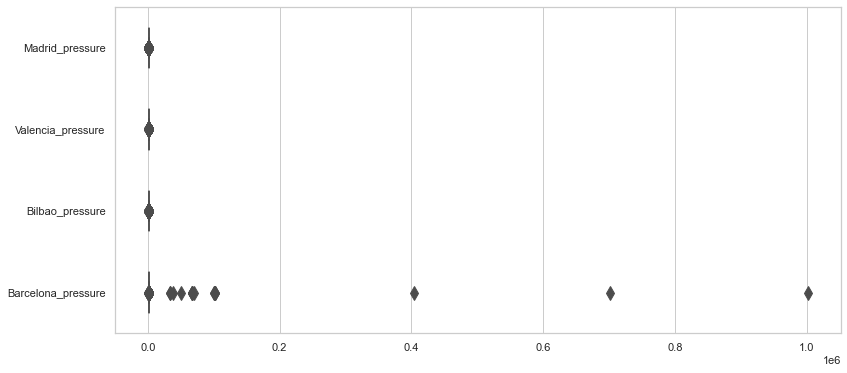

In [13]:
#pressure
selected_columns = df[ ['Madrid_pressure', 'Valencia_pressure', 'Bilbao_pressure', 'Seville_pressure', 'Barcelona_pressure'] ]
df_pressure = selected_columns.copy() 

sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(13,6))
sns.boxplot(data=df_pressure,orient="h",width=0.5, fliersize=10)

<AxesSubplot:>

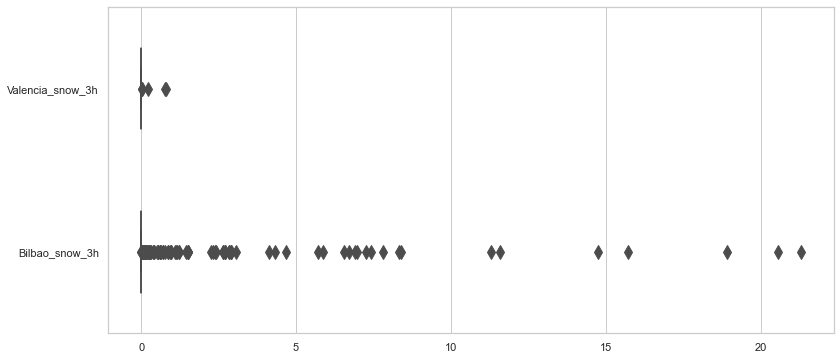

In [14]:
#snow_3h
selected_columns = df[ ['Valencia_snow_3h', 'Bilbao_snow_3h'] ]
df_snow_3h = selected_columns.copy() 

sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(13,6))
sns.boxplot(data=df_snow_3h,orient="h",width=0.5, fliersize=10)

<AxesSubplot:>

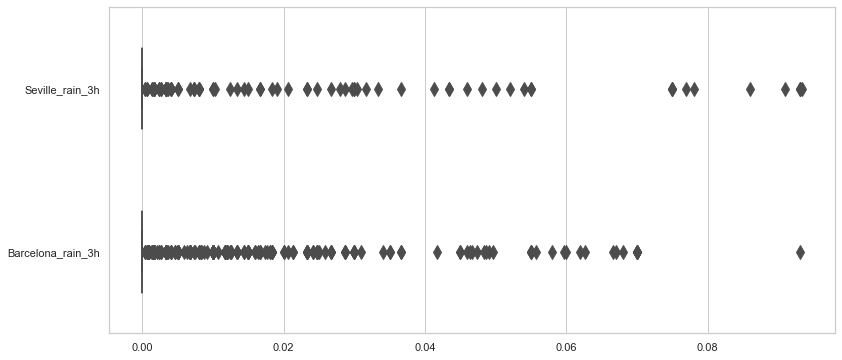

In [15]:
#rain_3h
selected_columns = df[ ['Seville_rain_3h', 'Barcelona_rain_3h' ]]
df_rain_3h = selected_columns.copy() 

sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(13,6))
sns.boxplot(data=df_rain_3h,orient="h",width=0.5, fliersize=10)

<AxesSubplot:>

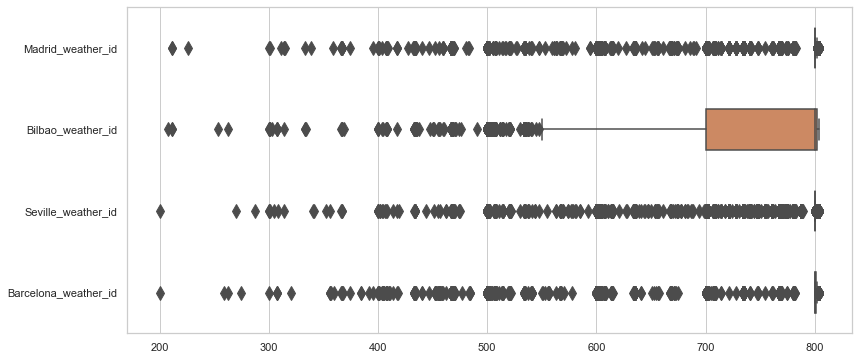

In [16]:
#weather_id
selected_columns = df[ ['Madrid_weather_id', 'Bilbao_weather_id', 'Seville_weather_id', 'Barcelona_weather_id' ]]
df_weather_id = selected_columns.copy() 

sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(13,6))
sns.boxplot(data=df_weather_id,orient="h",width=0.5, fliersize=10)

<AxesSubplot:>

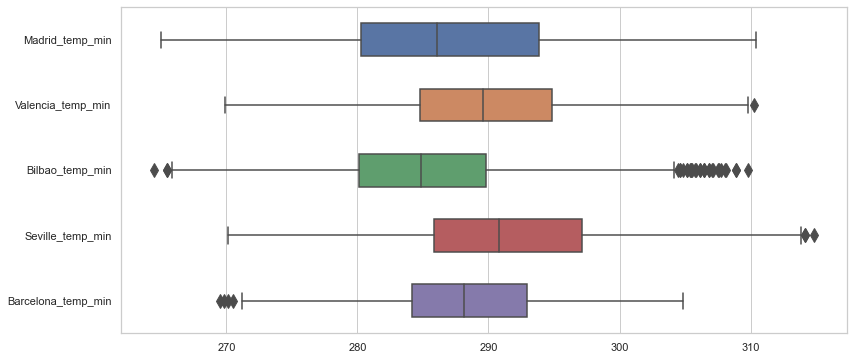

In [20]:
#temp_min
selected_columns = df[ ['Madrid_temp_min', 'Valencia_temp_min', 'Bilbao_temp_min', 'Seville_temp_min', 'Barcelona_temp_min']]
df_temp_min = selected_columns.copy() 

sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(13,6))
sns.boxplot(data=df_temp_min,orient="h",width=0.5, fliersize=10)

<AxesSubplot:>

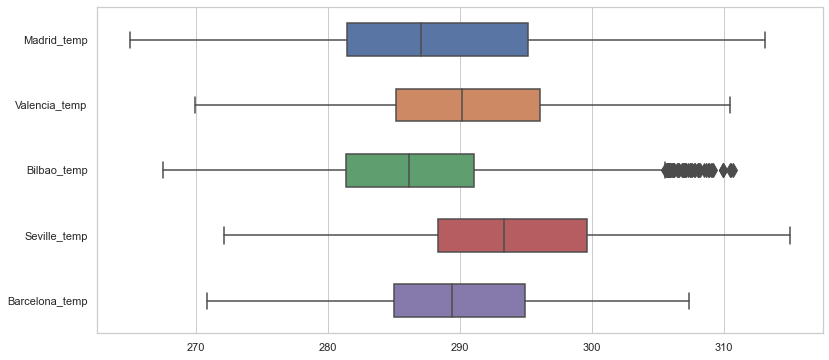

In [17]:
#temp
selected_columns = df[ ['Madrid_temp', 'Valencia_temp', 'Bilbao_temp', 'Seville_temp', 'Barcelona_temp']]
df_temp = selected_columns.copy() 

sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(13,6))
sns.boxplot(data=df_temp,orient="h",width=0.5, fliersize=10)

#### Correlation and Multicollinearity

Below we plot relevant feature interactions

C:\Users\Jenipher\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


<AxesSubplot:xlabel='Barcelona_temp', ylabel='load_shortfall_3h'>

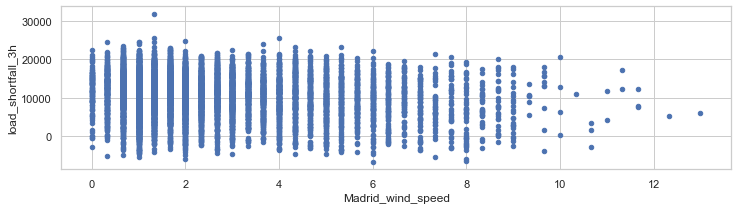

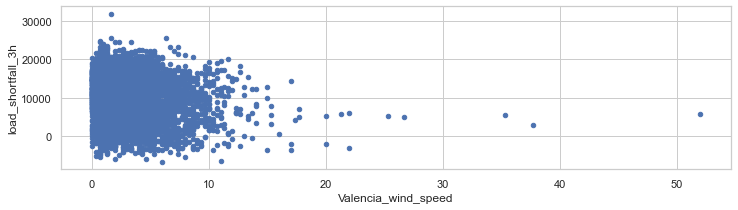

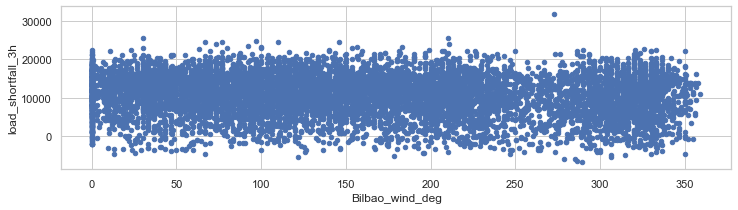

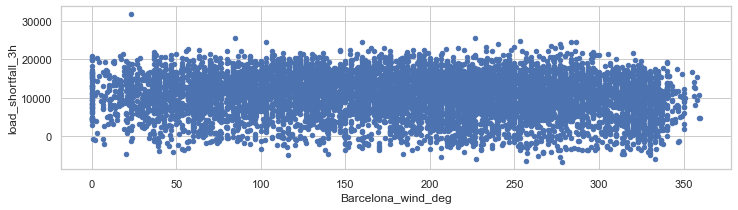

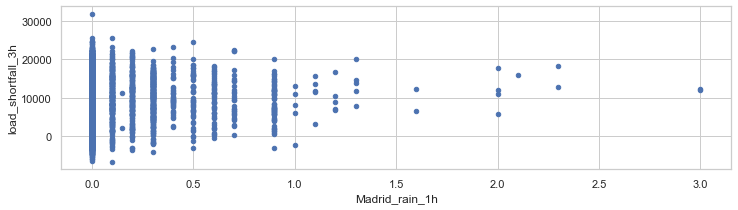

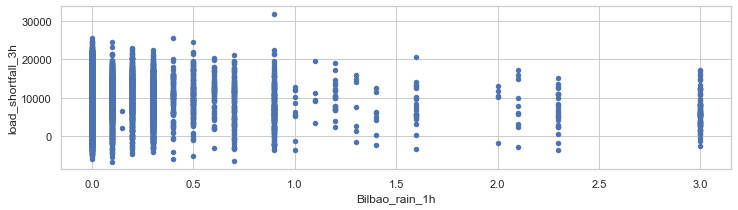

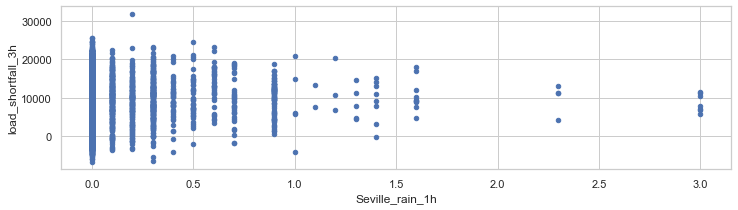

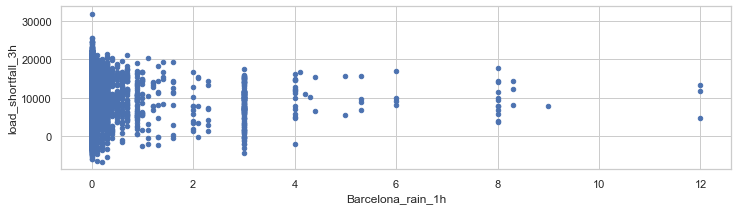

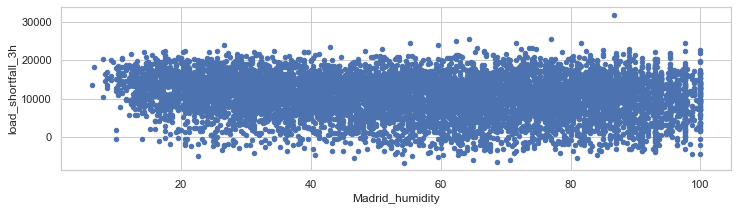

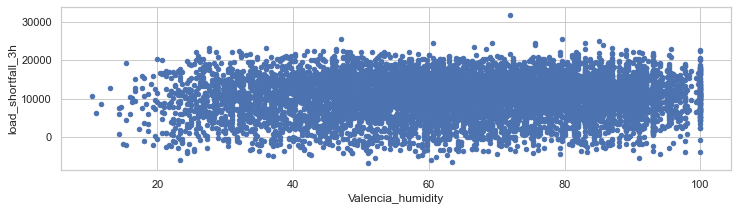

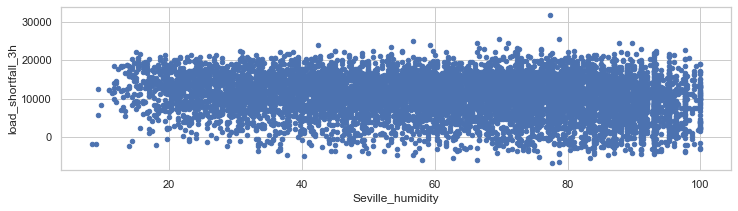

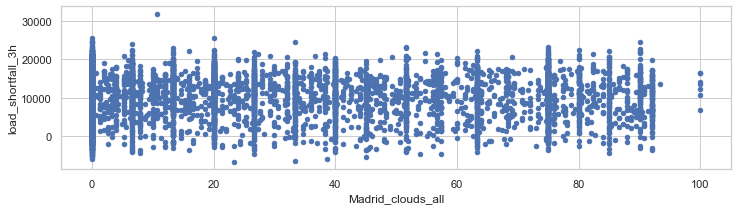

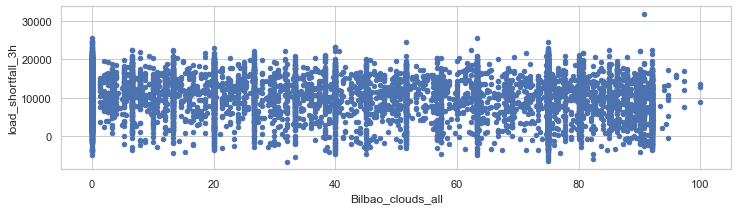

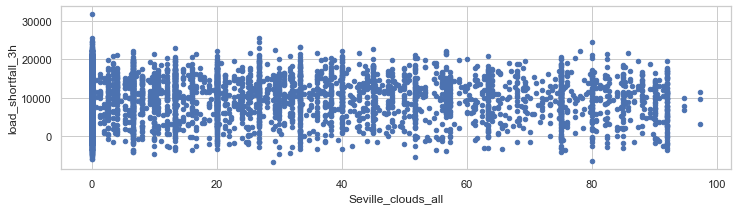

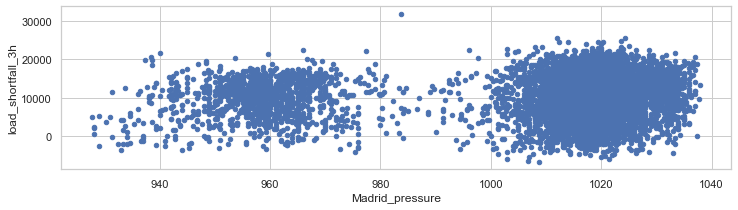

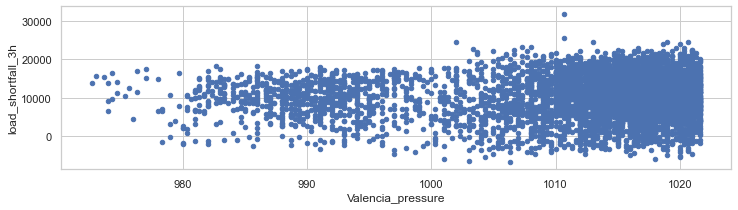

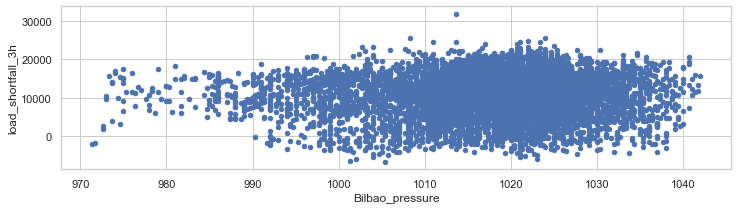

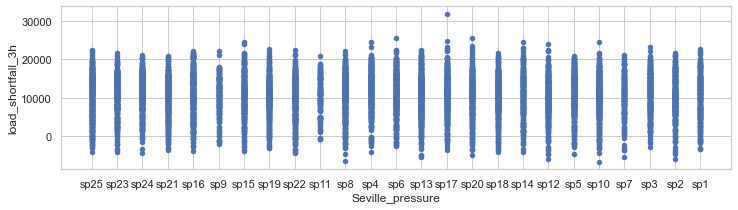

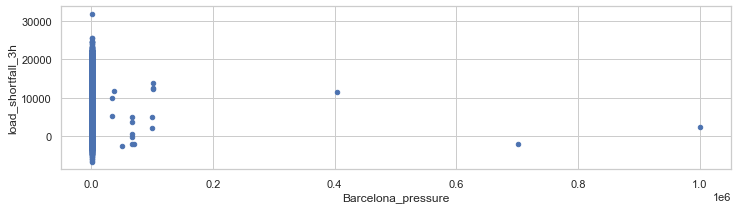

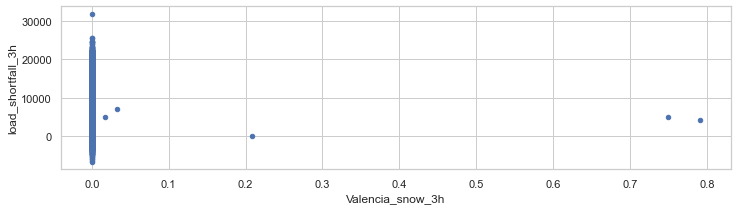

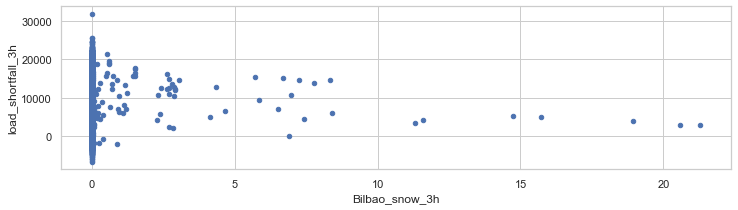

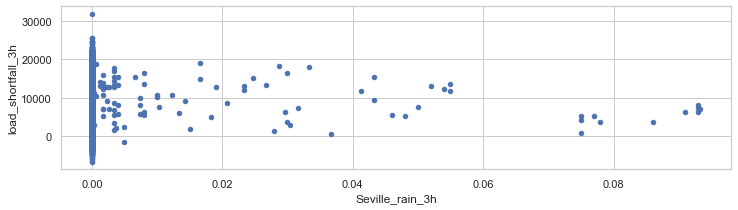

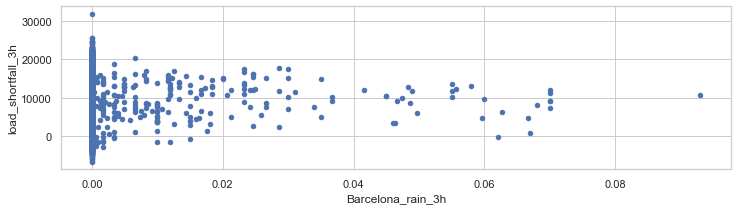

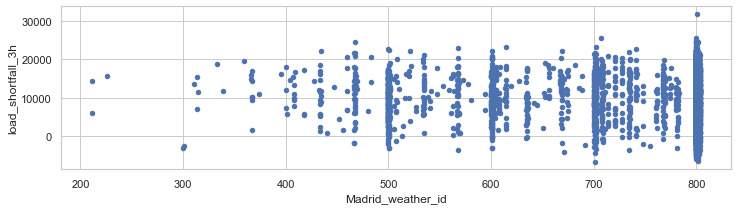

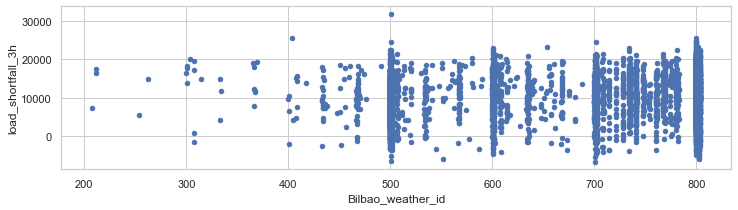

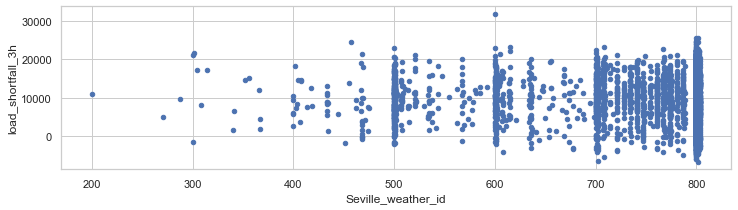

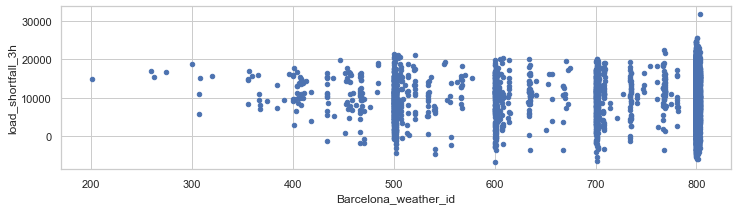

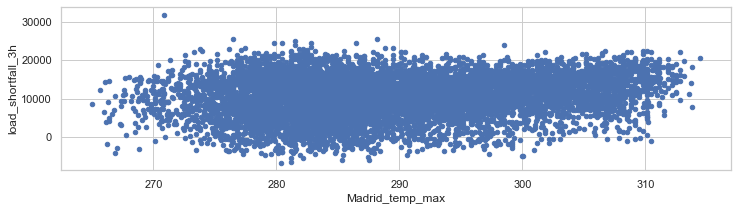

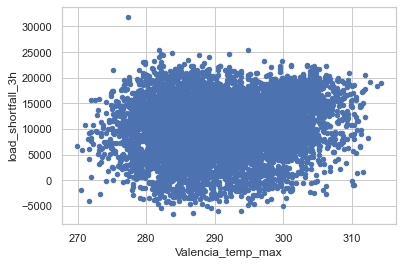

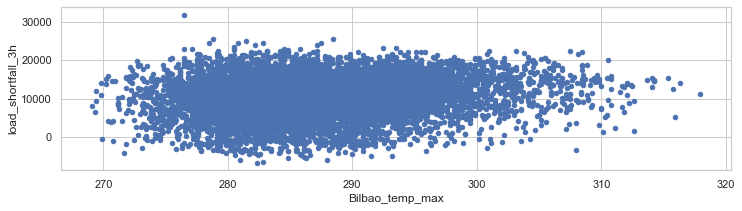

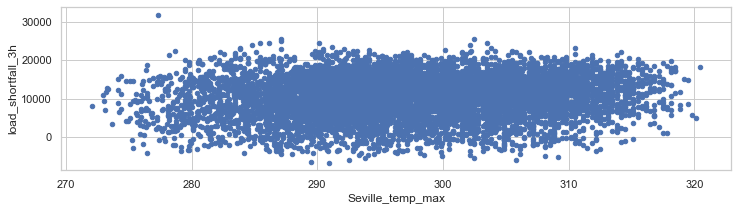

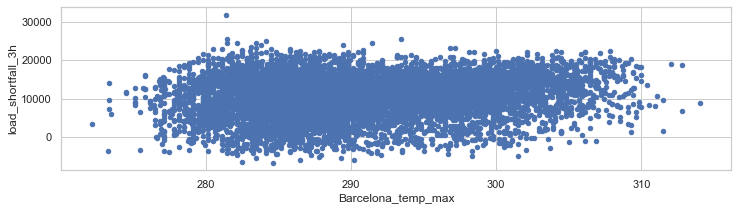

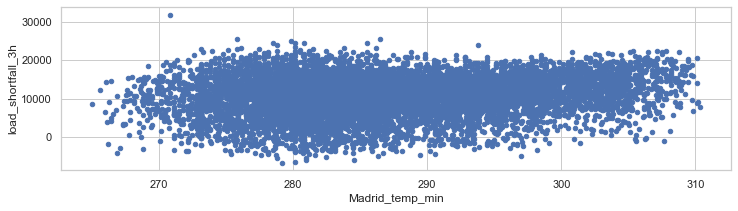

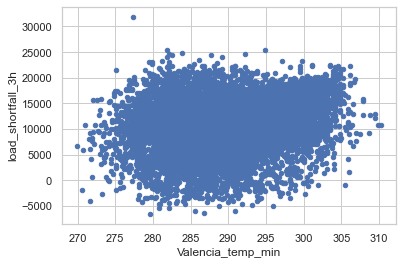

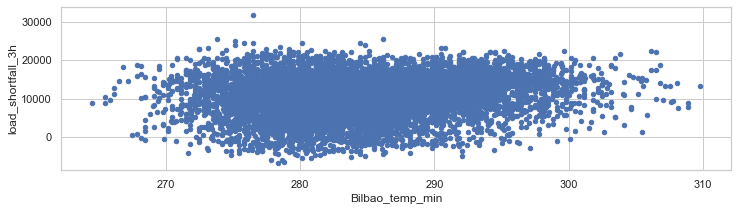

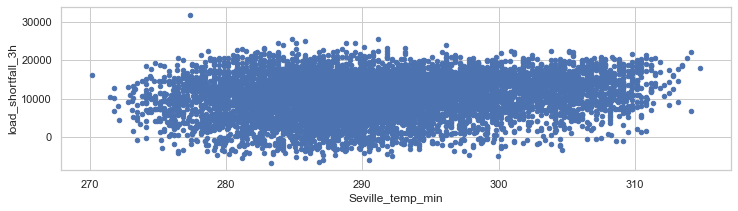

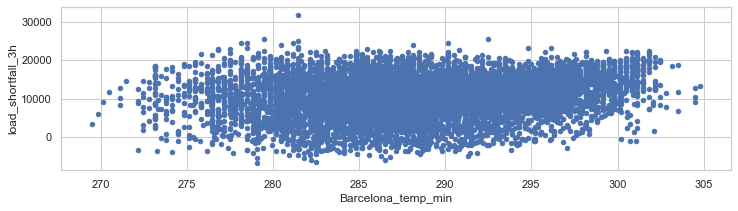

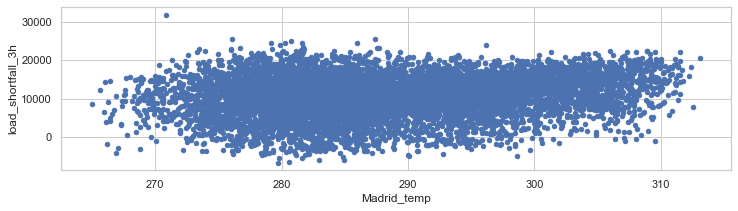

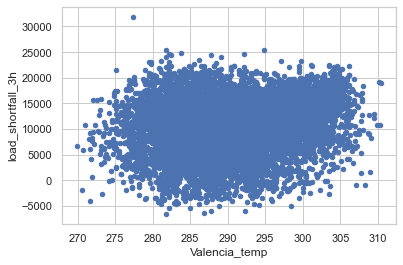

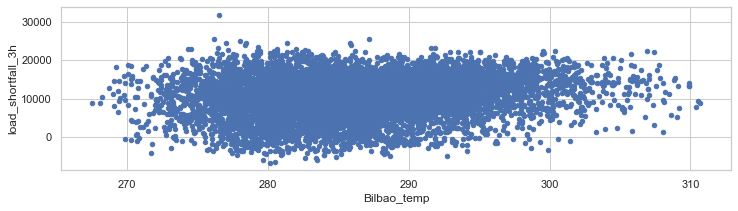

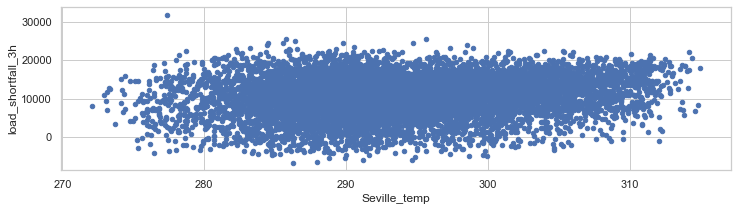

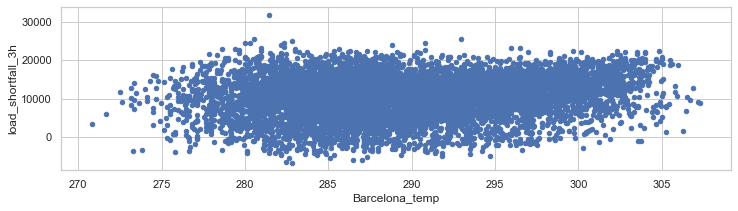

In [18]:

# wind speed
df.plot.scatter(x='Madrid_wind_speed',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Valencia_wind_speed',y='load_shortfall_3h', figsize=(12, 3))

# wind degrees
df.plot.scatter(x='Bilbao_wind_deg',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Barcelona_wind_deg',y='load_shortfall_3h', figsize=(12, 3))

#rain
df.plot.scatter(x='Madrid_rain_1h',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Bilbao_rain_1h',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Seville_rain_1h',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Barcelona_rain_1h',y='load_shortfall_3h', figsize=(12, 3))

#humidity

df.plot.scatter(x='Madrid_humidity',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Valencia_humidity',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Seville_humidity',y='load_shortfall_3h', figsize=(12, 3))

#clouds
df.plot.scatter(x='Madrid_clouds_all',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Bilbao_clouds_all',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Seville_clouds_all',y='load_shortfall_3h', figsize=(12, 3))


#pressure
df.plot.scatter(x='Madrid_pressure',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Valencia_pressure',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Bilbao_pressure',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Seville_pressure',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Barcelona_pressure',y='load_shortfall_3h', figsize=(12, 3))

#snow_3h
df.plot.scatter(x='Valencia_snow_3h',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Bilbao_snow_3h',y='load_shortfall_3h', figsize=(12, 3))

#rain_3h
df.plot.scatter(x='Seville_rain_3h',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Barcelona_rain_3h',y='load_shortfall_3h', figsize=(12, 3))

#weather_id
df.plot.scatter(x='Madrid_weather_id',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Bilbao_weather_id',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Seville_weather_id',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Barcelona_weather_id',y='load_shortfall_3h', figsize=(12, 3))

#temp_max
df.plot.scatter(x='Madrid_temp_max',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Valencia_temp_max',y='load_shortfall_3h')
df.plot.scatter(x='Bilbao_temp_max',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Seville_temp_max',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Barcelona_temp_max',y='load_shortfall_3h', figsize=(12, 3))

#temp_min
df.plot.scatter(x='Madrid_temp_min',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Valencia_temp_min',y='load_shortfall_3h')
df.plot.scatter(x='Bilbao_temp_min',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Seville_temp_min',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Barcelona_temp_min',y='load_shortfall_3h', figsize=(12, 3))

#temp
df.plot.scatter(x='Madrid_temp',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Valencia_temp',y='load_shortfall_3h')
df.plot.scatter(x='Bilbao_temp',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Seville_temp',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Barcelona_temp',y='load_shortfall_3h', figsize=(12, 3))

We observe no clear negative or positive correclation with regards to the features and load shortfall

In [23]:
# evaluate correlation
df.corr()


,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Unnamed: 0,1.000000,-0.109288,-0.249633,-0.090161,-0.079025,-0.103359,-0.068123,0.049197,-0.140583,-0.155738,-0.218781,-0.140449,-0.116928,-0.093926,-0.075692,-0.075340,-0.092377,-0.040157,-0.082525,-0.068980,-0.104326,-0.028130,0.047202,0.034761,-0.022475,0.072472,0.267772,0.039424,0.385578,0.087002,0.135294,0.192485,0.042897,0.023917,0.185468,0.047417,0.093378,0.068078,0.028698,0.081799,0.103436,0.146216,0.037487,0.088439,0.085197,0.192612
Madrid_wind_speed,-0.109288,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,0.294640,-0.095380,0.230126,0.434104,0.062758,0.108413,0.071183,0.011134,0.004795,0.150446,-0.014644,0.021660,-0.169358,-0.099582,-0.231747,-0.120014,-0.157088,0.050043,-0.136672,0.133468,0.128726,-0.238128,0.090861,-0.285787,0.119657,0.061854,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981
Bilbao_rain_1h,-0.249633,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,0.069997,-0.030723,0.135524,0.140101,0.052558,0.092984,0.096730,0.052458,0.016392,0.187423,-0.001412,0.008269,-0.147768,-0.120618,-0.054814,-0.095723,-0.206765,-0.210323,-0.298587,-0.135198,-0.127953,-0.604616,-0.170009,-0.103868,-0.116835,-0.157326,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510
Valencia_wind_speed,-0.090161,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,0.347966,-0.066071,0.221887,0.316035,0.031804,0.046085,0.115133,0.050282,0.027637,0.093865,-0.037553,0.058629,-0.099056,-0.037605,-0.096374,-0.069092,-0.041408,-0.024045,-0.158475,0.065815,0.072366,-0.201379,-0.008508,-0.413017,0.075533,-0.040998,-0.021970,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791
Seville_humidity,-0.079025,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,-0.138625,0.164064,0.366602,-0.202449,-0.051022,0.227476,0.023556,0.021599,0.034343,0.164019,0.015555,0.007351,-0.228442,-0.050515,-0.099458,-0.328265,-0.088094,-0.566426,-0.103813,-0.650643,-0.663276,-0.105088,-0.743126,0.464012,-0.657427,-0.606770,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290
Madrid_humidity,-0.103359,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,-0.058518,0.183725,0.484293,-0.125680,-0.061265,0.195455,0.031653,0.025198,0.059958,0.250614,0.017797,0.012571,-0.341407,-0.051139,-0.053074,-0.291095,-0.168207,-0.576413,-0.121737,-0.705918,-0.706989,-0.139686,-0.738819,0.378980,-0.689854,-0.691803,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536
Bilbao_clouds_all,-0.068123,0.244001,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,0.094019,-0.065120,0.109788,0.075066,0.052913,0.041090,0.080180,0.037506,0.009557,0.089281,-0.041013,0.024339,-0.080837,-0.124169,0.000377,-0.033825,-0.079778,-0.102322,-0.135672,0.002621,-0.000299,-0.536205,-0.095003,-0.129684,-0.003806,-0.034040,-0.048491,-0.023171,-0.067731,-0.114118,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293
Bilbao_wind_speed,0.049197,0.37785

The following features are positively correclated with load_shortfall_3h
 - Madrid_wind_speed
 - Bilbao_rain_1h
 - Valencia_wind_speed
 - Seville_humidity
 - Madrid_humidity
 - Madrid_humidity
 - Bilbao_clouds_all
 - Bilbao_wind_speed
 - Seville_clouds_all
 - Bilbao_wind_deg
 - Barcelona_wind_speed
 - Barcelona_wind_deg
 - Madrid_clouds_all
 - Seville_wind_speed
 - Barcelona_rain_1h
 - Bilbao_snow_3h
 - Barcelona_pressure
 - Seville_rain_3h
 - Madrid_rain_1h
 - Barcelona_rain_3h
 - Valencia_snow_3h


The following features are negatively correclated with load_shortfall_3h

 
- Madrid_weather_id
- Barcelona_weather_id
- Bilbao_pressure
- Seville_weather_id
- Valencia_pressure
- Seville_temp_max
- Madrid_pressure
- Valencia_temp_max
- Valencia_temp
- Bilbao_weather_id
- Seville_temp
- Valencia_humidity
- Barcelona_temp_max
- Madrid_temp_max
- Barcelona_temp
- Bilbao_temp_min
- Bilbao_temp
- Barcelona_temp_min
- Bilbao_temp_max
- Seville_temp_min
- Madrid_temp
- Madrid_temp_min

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In this section we will clean the dataset and engineer the features, as identified in the EDA phase. 

We will look at:

- Updating the categorical features (time,Valencia_wind_deg and Seville_pressure)
- Removing missing values
- Removing Outliers
- Variable selection using correlation
- Removing features with 0.0 values

We will change the time data type to date data

In [19]:
df.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [16]:
#changing the time column from 'object' dtype to 'date'



df['time'] = pd.to_datetime(df['time']) #astype(int64)
df.set_index('time', inplace=True)

df.head()

KeyError: 'time'

We can plot time against the dependent variable.

In [17]:
df['time']



#df.plot.scatter(x='time',y='load_shortfall_3h', figsize=(12, 3))
#df = df.sort_values('time', ascending=True)
#plt.plot(df['time'], df['load_shortfall_3h'])
#plt.xticks(rotation='vertical')

KeyError: 'time'

### Missing Values


We will replace the __Valencia_pressure__ missing values with the mean and then remove the columns, __Valencia_snow_3h__, __Bilbao_snow_3h__, __Seville_rain_3h__, and __Barcelona_rain_3h__ because they have only zero values.

In [20]:
# remove missing values/ features

#Filling missing value with the mean
df_no_missing = df.fillna(value=df['Valencia_pressure'].mean())
#removing the unnamed column
df_no_missing.drop('Unnamed: 0', inplace =True, axis=1)

#dropping column that have only zero values
df_no_missing.drop(columns =['Valencia_snow_3h', 'Bilbao_snow_3h', 'Seville_rain_3h', 'Barcelona_rain_3h'], inplace= True)

df_no_missing.head()


,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Barcelona_pressure,Madrid_rain_1h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,1036.333333,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,1037.333333,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,1038.000000,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,1037.000000,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,1035.000000,0.0,800.0,800.0,1035.333333,800.0,1012.051407,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


There are now no variables with missing data

In [21]:
df_no_missing.isnull().sum()

time                    0
Madrid_wind_speed       0
Valencia_wind_deg       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Barcelona_rain_1h       0
Seville_pressure        0
Seville_rain_1h         0
Barcelona_pressure      0
Madrid_rain_1h          0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Valencia_pressure       0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp            0
Valencia_humidity       0
Valencia_temp_min       0
Barcelona_temp_max      0
Madrid_temp_max         0
Barcelona_temp          0
Bilbao_temp_min         0
Bilbao_temp             0
Barcelona_te


### Outliers


We can use the interquartile range (IQR) to remove outlier values. The IQR is the first quartile subtracted from the third quartile. These quartiles are clearly seen on a box plot of the data.

In [22]:
df_no_cat=df_no_missing.drop(['Valencia_wind_deg', 'Seville_pressure'], axis=1) #numerical variables

Q1 = df_no_cat.quantile(0.25)
Q3 = df_no_cat.quantile(0.75)
IQR = Q3 - Q1 #IQR for each column


df2 = df_no_cat[~((df_no_cat < (Q1 - 1.5 * IQR)) |(df_no_cat > (Q3 + 1.5 * IQR))).any(axis=1)]

<ipython-input-22-08c210b1a385>:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df2 = df_no_cat[~((df_no_cat < (Q1 - 1.5 * IQR)) |(df_no_cat > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-22-08c210b1a385>:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df2 = df_no_cat[~((df_no_cat < (Q1 - 1.5 * IQR)) |(df_no_cat > (Q3 + 1.5 * IQR))).any(axis=1)]


Below we can see the both datasets, with and without the outliers

In [23]:
df.shape

(8763, 49)

In [24]:
df2.shape

(2656, 42)

In [25]:
df2.kurtosis()

Madrid_wind_speed         1.588655
Bilbao_rain_1h            9.757766
Valencia_wind_speed       0.465193
Seville_humidity         -1.034747
Madrid_humidity          -0.697365
Bilbao_clouds_all        -1.595543
Bilbao_wind_speed         0.496355
Seville_clouds_all      126.576720
Bilbao_wind_deg          -0.782769
Barcelona_wind_speed     -0.108298
Barcelona_wind_deg       -0.882785
Madrid_clouds_all         7.911713
Seville_wind_speed       -0.124333
Barcelona_rain_1h         0.000000
Seville_rain_1h           0.000000
Barcelona_pressure        0.630047
Madrid_rain_1h            0.000000
Madrid_weather_id         7.994314
Barcelona_weather_id     -0.329418
Bilbao_pressure           1.300922
Seville_weather_id        0.000000
Valencia_pressure        -1.281730
Seville_temp_max         -0.456016
Madrid_pressure           0.320409
Valencia_temp_max        -0.547708
Valencia_temp            -0.618278
Bilbao_weather_id         5.021290
Seville_temp             -0.580636
Valencia_humidity   

We can also see with the function df.kurtosis, that the values of kurtosis greater than 3 have significantly reduced

### Variable Selection

We will exploring the correlations between the variables in order to do variable selection

In [26]:
df2.corr()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Barcelona_pressure,Madrid_rain_1h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Madrid_wind_speed,1.000000,0.102409,0.396950,-0.259667,-0.348060,0.192617,0.221445,-0.025245,0.209537,0.166452,-0.174515,0.164900,0.279702,NaN,NaN,-0.320070,NaN,0.165858,0.098793,-0.199760,NaN,-0.085879,0.208483,-0.319813,0.267707,0.255679,-0.069454,0.276515,-0.157076,0.239998,0.234073,0.289206,0.232405,0.218790,0.208070,0.206396,0.192977,0.289490,0.312808,0.288643,-0.002715
Bilbao_rain_1h,0.102409,1.000000,0.014695,0.091409,0.088594,0.321060,0.009342,0.025865,0.082442,-0.009853,0.009844,0.074574,-0.046101,NaN,NaN,-0.160259,NaN,0.071000,0.032315,-0.008292,NaN,-0.093087,-0.138144,-0.055987,-0.085112,-0.087414,-0.834086,-0.147759,-0.047573,-0.088214,-0.110422,-0.121481,-0.105249,-0.089511,-0.110344,-0.093788,-0.126493,-0.138450,-0.113912,-0.101633,-0.025992
Valencia_wind_speed,0.396950,0.014695,1.000000,-0.417431,-0.334854,0.155490,0.471354,-0.044991,0.245478,0.390222,-0.220337,0.221387,0.228059,NaN,NaN,-0.222664,NaN,0.223514,0.181098,-0.010138,NaN,-0.003974,0.246779,-0.186872,0.292018,0.301904,0.013196,0.324757,-0.429860,0.303759,0.203842,0.274932,0.224971,0.281939,0.271675,0.234553,0.257062,0.340081,0.296962,0.281760,-0.003469
Seville_humidity,-0.259667,0.091409,-0.417431,1.000000,0.758488,0.013182,-0.367770,0.117889,-0.221912,-0.275169,0.328905,-0.046676,-0.318337,NaN,NaN,0.170564,NaN,-0.048946,-0.105225,0.121906,NaN,-0.090092,-0.561620,0.240414,-0.638020,-0.656178,-0.157621,-0.741003,0.479255,-0.656481,-0.585947,-0.682451,-0.606565,-0.642418,-0.635706,-0.594848,-0.613143,-0.783460,-0.697211,-0.674716,-0.194420
Madrid_humidity,-0.348060,0.088594,-0.334854,0.758488,1.000000,-0.009314,-0.236706,0.085141,-0.190122,-0.139487,0.393072,0.053674,-0.300079,NaN,NaN,0.371219,NaN,0.047179,-0.099359,0.320584,NaN,-0.127651,-0.586567,0.470090,-0.756915,-0.762265,-0.157539,-0.775695,0.331994,-0.750824,-0.727843,-0.833767,-0.738324,-0.715026,-0.702068,-0.705788,-0.670393,-0.819615,-0.844092,-0.807944,-0.184014
Bilbao_clouds_all,0.192617,0.321060,0.155490,0.013182,-0.009314,1.000000,0.034602,0.007287,0.179115,0.067220,-0.047955,0.088908,0.004747,NaN,NaN,-0.249136,NaN,0.090925,0.112456,0.129338,NaN,-0.028558,0.019525,-0.124903,0.088988,0.090044,-0.347546,0.012360,-0.112187,0.085909,0.052763,0.038708,0.061315,0.013656,-0.022914,0.068859,-0.057399,0.005757,0.044066,0.044818,-0.035638
Bilbao_wind_speed,0.221445,0.009342,0.471354,-0.367770,-0.236706,0.034602,1.000000,-0.050986,0.489942,0.337669,-0.135756,0.163121,0.157939,NaN,NaN,-0.136963,NaN,0.160368,0.128819,-0.081186,NaN,-0.023460,0.217647,-0.115146,0.231667,0.246207,0.046944,0.278022,-0.377462,0.253517,0.184882,0.218758,0.199060,0.291512,0.314302,0.203749,0.331550,0.288117,0.237972,0.229588,0.020164
Seville_clouds_all,-0.025245,0.025865,-0.044991,0.117889,0.085141,0.007287,-0.050986,1.000000,0.012941,-0.002335,0.010633,0.031234,-0.056021,NaN,NaN,0.002006,NaN,0.041883,0.003618,-0.038487,NaN,-0.014676,-0.113064,0.027235,-0.091596,-0.096804,-0.018737,-0.102800,0.065665,-0.098095,-0.066885,-0.091626,-0.074025,-0.061164,-0.073215,-0.070164,-0.084287,-0.085321,-0.083743,-0.072157,-0.057329
Bilbao_wind_deg,0.209537,0.082442,0.245478,-0.221912,-0.190122,0.179115,0.489942,0.012941,1.000000,0.218675,-0.102617,0.096724,0.107988,NaN,NaN,-0.167296,NaN,0.095329,0.045526,-0.133553,NaN,-0.054183,0.103267,-0.125011,0.20

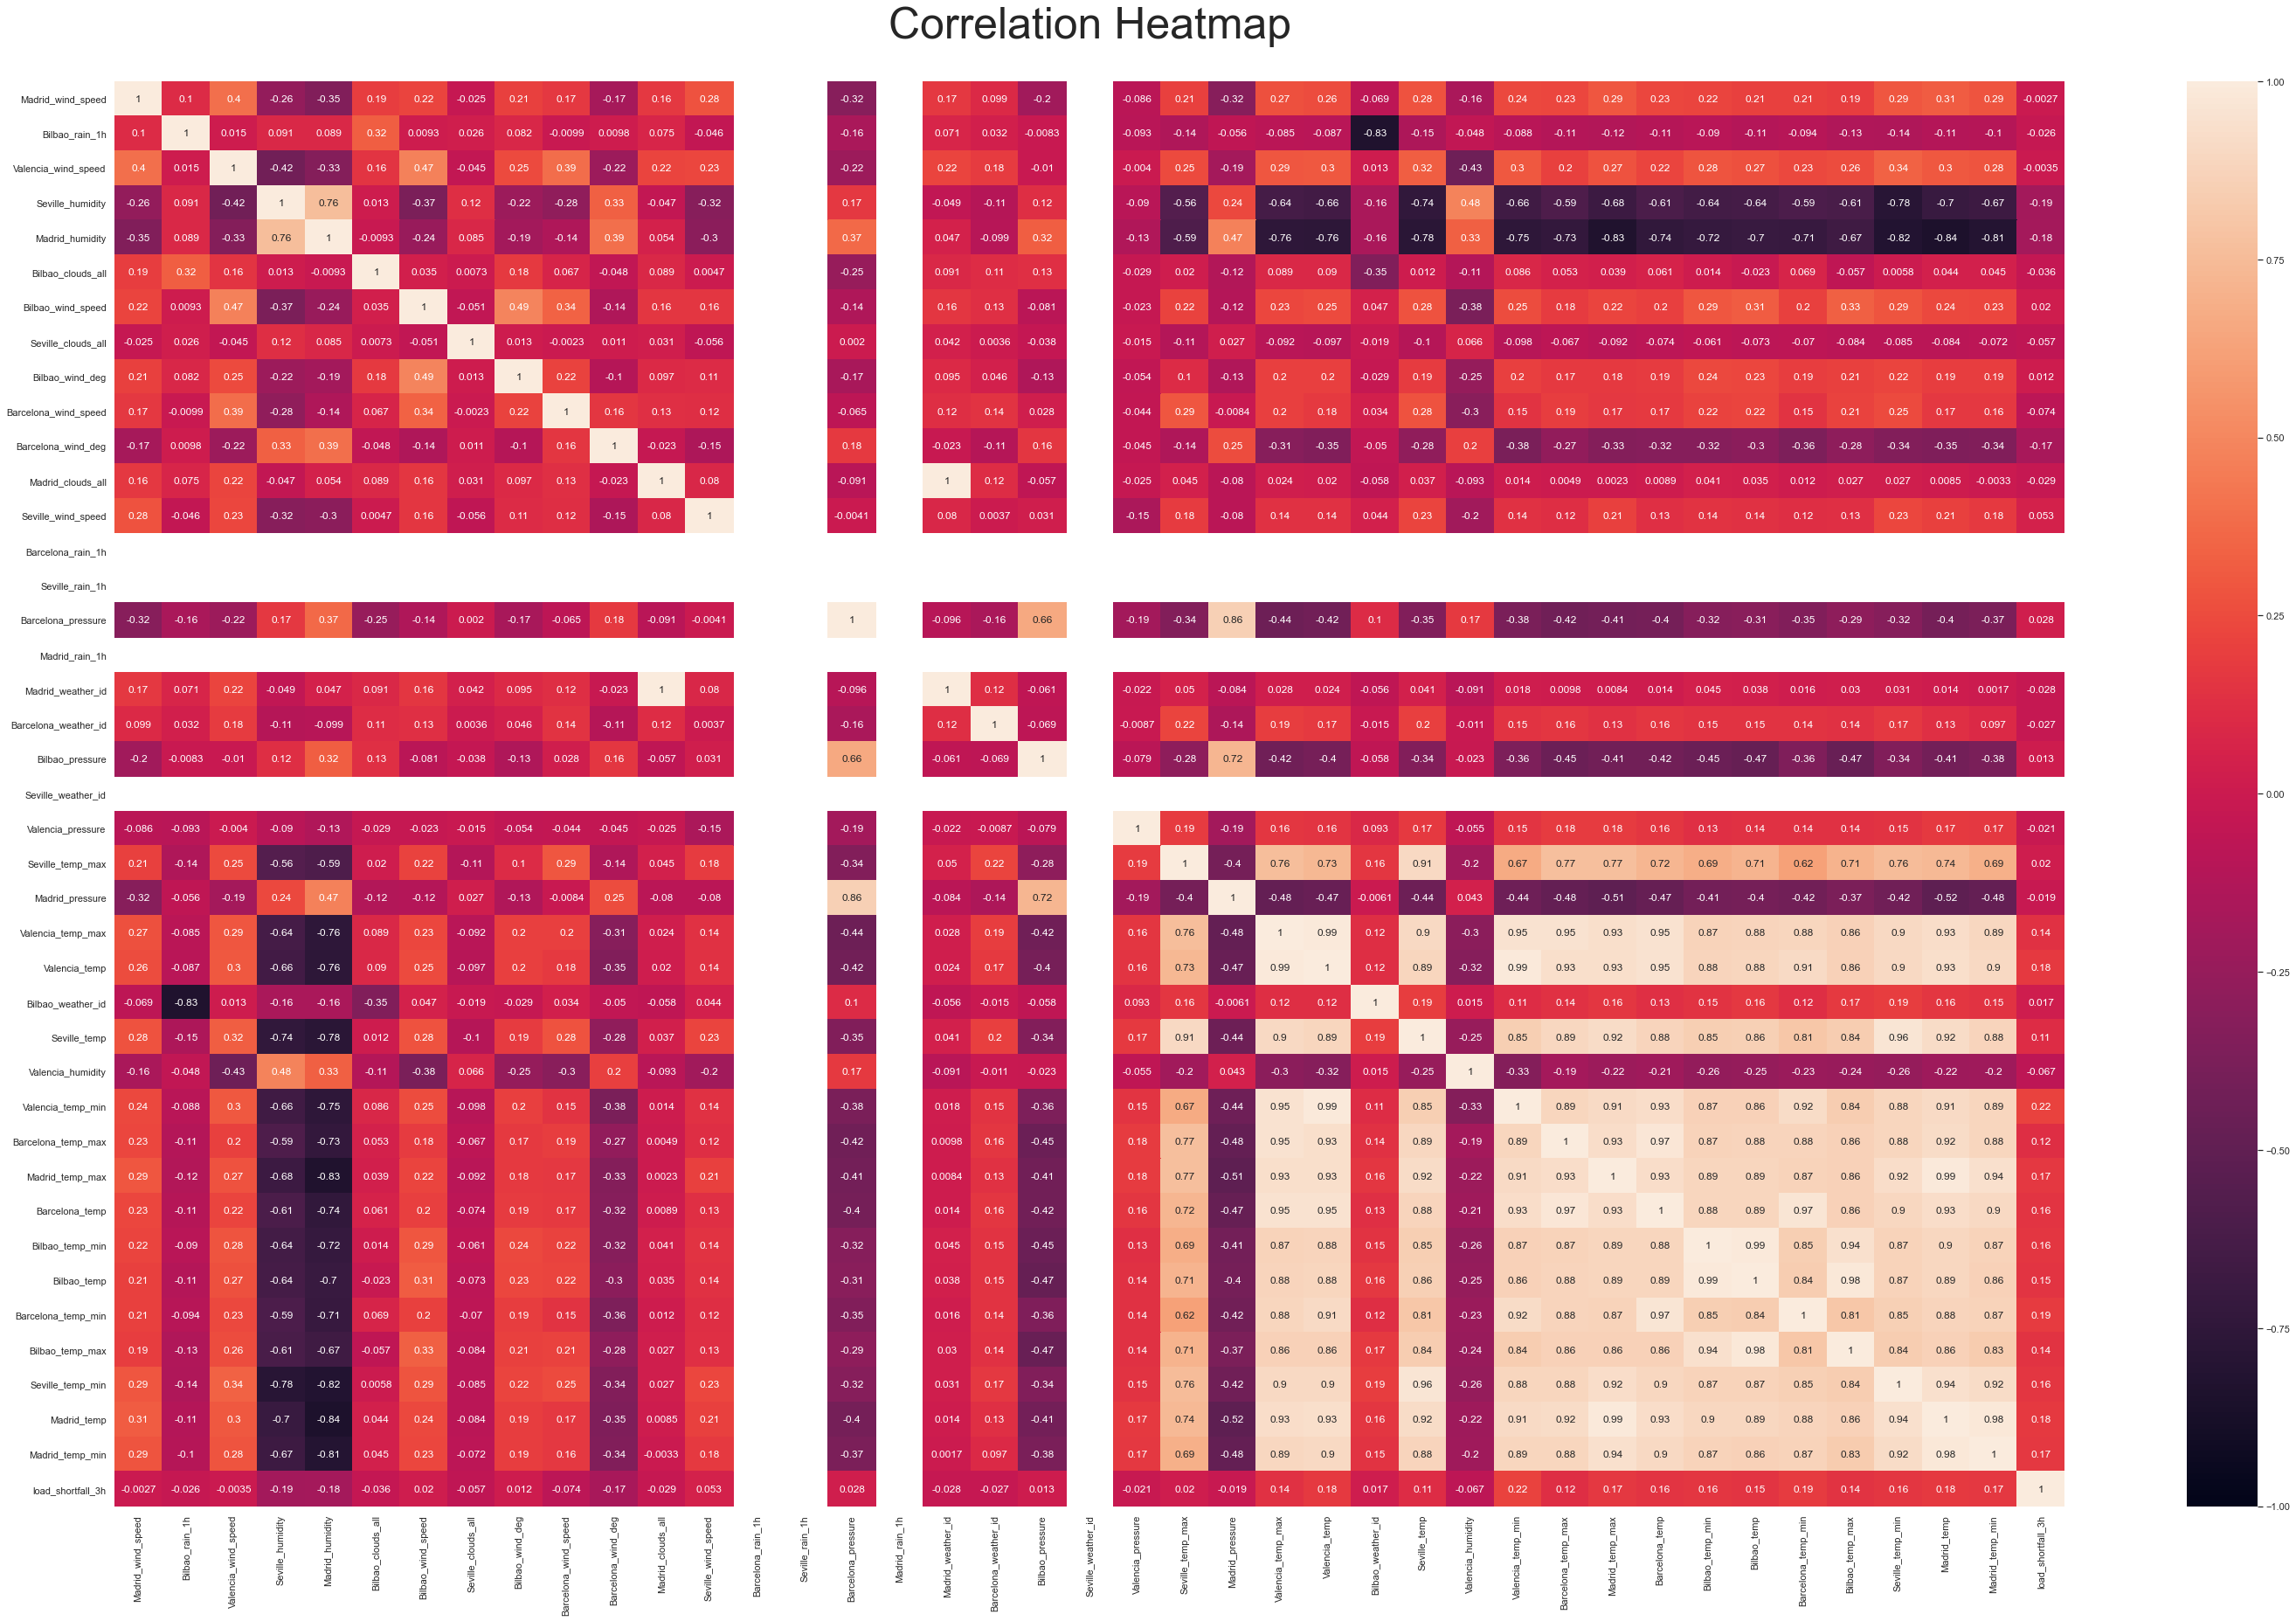

In [27]:
# engineer existing features
correlation = df2.corr()

plt.figure(figsize =(50,30))
thegraph = sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)
thegraph.set_title('Correlation Heatmap', fontdict={'fontsize':50}, pad=50);




In the **Heatmap** above, we observe a high number of highly correlated features, amongst the minimum and maximum temperatures.


This can be problematic because it will becomes difficult for the model to estimate the relationship between each independent variable and the dependent variable independently as the independent variables will tend to change in unison. To train our model well, we blieve it is better to drop those features that highly correlated to each other.


The code below will remove one of each of the highly correlated pairs of features that are highly correlated with each other.

In [31]:
def correlations(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
            

In [32]:
corr_features = correlations(df2, 0.6)
len(set(corr_features))
print('Correlated features: ', len(set(corr_features)))
print('Correlated features are: ', corr_features)

Correlated features:  19
Correlated features are:  {'Madrid_temp', 'Seville_temp', 'Barcelona_temp', 'Barcelona_temp_max', 'Madrid_temp_min', 'Madrid_humidity', 'Valencia_temp_min', 'Valencia_temp_max', 'Barcelona_temp_min', 'Bilbao_temp', 'Seville_temp_min', 'Valencia_temp', 'Madrid_temp_max', 'Madrid_weather_id', 'Madrid_pressure', 'Bilbao_pressure', 'Bilbao_weather_id', 'Bilbao_temp_min', 'Bilbao_temp_max'}


In [33]:
df2.shape

(2656, 42)

In [34]:
df2_non_corr=df2.drop(corr_features, axis=1)

In [35]:
df2_non_corr.shape

(2656, 23)

In [36]:
df2_non_corr.corr()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Barcelona_pressure,Madrid_rain_1h,Barcelona_weather_id,Seville_weather_id,Valencia_pressure,Seville_temp_max,Valencia_humidity,load_shortfall_3h
Madrid_wind_speed,1.000000,0.102409,0.396950,-0.259667,0.192617,0.221445,-0.025245,0.209537,0.166452,-0.174515,0.164900,0.279702,NaN,NaN,-0.320070,NaN,0.098793,NaN,-0.085879,0.208483,-0.157076,-0.002715
Bilbao_rain_1h,0.102409,1.000000,0.014695,0.091409,0.321060,0.009342,0.025865,0.082442,-0.009853,0.009844,0.074574,-0.046101,NaN,NaN,-0.160259,NaN,0.032315,NaN,-0.093087,-0.138144,-0.047573,-0.025992
Valencia_wind_speed,0.396950,0.014695,1.000000,-0.417431,0.155490,0.471354,-0.044991,0.245478,0.390222,-0.220337,0.221387,0.228059,NaN,NaN,-0.222664,NaN,0.181098,NaN,-0.003974,0.246779,-0.429860,-0.003469
Seville_humidity,-0.259667,0.091409,-0.417431,1.000000,0.013182,-0.367770,0.117889,-0.221912,-0.275169,0.328905,-0.046676,-0.318337,NaN,NaN,0.170564,NaN,-0.105225,NaN,-0.090092,-0.561620,0.479255,-0.194420
Bilbao_clouds_all,0.192617,0.321060,0.155490,0.013182,1.000000,0.034602,0.007287,0.179115,0.067220,-0.047955,0.088908,0.004747,NaN,NaN,-0.249136,NaN,0.112456,NaN,-0.028558,0.019525,-0.112187,-0.035638
Bilbao_wind_speed,0.221445,0.009342,0.471354,-0.367770,0.034602,1.000000,-0.050986,0.489942,0.337669,-0.135756,0.163121,0.157939,NaN,NaN,-0.136963,NaN,0.128819,NaN,-0.023460,0.217647,-0.377462,0.020164
Seville_clouds_all,-0.025245,0.025865,-0.044991,0.117889,0.007287,-0.050986,1.000000,0.012941,-0.002335,0.010633,0.031234,-0.056021,NaN,NaN,0.002006,NaN,0.003618,NaN,-0.014676,-0.113064,0.065665,-0.057329
Bilbao_wind_deg,0.209537,0.082442,0.245478,-0.221912,0.179115,0.489942,0.012941,1.000000,0.218675,-0.102617,0.096724,0.107988,NaN,NaN,-0.167296,NaN,0.045526,NaN,-0.054183,0.103267,-0.253859,0.011602
Barcelona_wind_speed,0.166452,-0.009853,0.390222,-0.275169,0.067220,0.337669,-0.002335,0.218675,1.000000,0.158483,0.125052,0.121533,NaN,NaN,-0.064908,NaN,0.141245,NaN,-0.043706,0.291594,-0.304884,-0.074223
Barcelona_wind_deg,-0.174515,0.009844,-0.220337,0.328905,-0.047955,-0.135756,0.010633,-0.102617,0.158483,1.000000,-0.023443,-0.147247,NaN,NaN,0.178864,NaN,-0.106531,NaN,-0.044982,-0.137352,0.199373,-0.168347


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In this section, we will create one or more regression models that are able to accurately predict the thee hour load shortfall. 


### 5.1 Fitting   linear regression models using Sklearn and OLS

We will first fit the cleaned data using Sklearn and OLS


__(i). *Sklearn*__

In [33]:
# split predictors and response
X = df2.drop(['load_shortfall_3h'], axis=1)
y = df2['load_shortfall_3h']

In [34]:
# create model object
lm = LinearRegression()

In [35]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=1)

In [36]:
# train model
lm.fit(X_train, y_train)

LinearRegression()

In [37]:
# extract model coeffs
beta_js = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])

In [38]:
# extract model intercept
beta_0 = float(lm.intercept_)

In [39]:
print("Intercept:", beta_0)



Intercept: 419049.4674916343


In [40]:
beta_js

,Coefficient
Madrid_wind_speed,-1.367733e+02
Bilbao_rain_1h,-8.368903e+02
Valencia_wind_speed,-2.330757e+02
Seville_humidity,-4.086307e+01
Madrid_humidity,4.941496e+00
Bilbao_clouds_all,-6.286216e+00
Bilbao_wind_speed,-6.211032e+01
Seville_clouds_all,-3.345093e+02
Bilbao_wind_deg,-3.452422e-01
Barcelona_wind_speed,-1.018759e+02


__*Predictive accuracy*__

In [41]:
# Import metrics module
from sklearn import metrics

In [42]:
train_pred = lm.predict(X_train)

test_pred = lm.predict(X_test)

In [43]:
print('Train MSE:', round(metrics.mean_squared_error(y_train, train_pred)))

Train MSE: 19247544


In [44]:
print('Test MSE:', round(metrics.mean_squared_error(y_test, test_pred)))

Test MSE: 20504643


 
 
 __*(ii). Fitting a Linear regression model using statmodels.OLS*__


In [42]:
import statsmodels.formula.api as sm

In [63]:
df2.head()

,time,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Barcelona_pressure,Madrid_rain_1h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
20,2015-01-03 15:00:00,1.000000,0.0,2.000000,75.333333,63.333333,0.000000,1.0,0.0,239.333333,1.333333,264.000000,0.0,2.666667,0.0,0.0,1032.666667,0.0,800.0,800.000000,1036.000000,800.0,1015.000000,287.305687,1000.000000,288.701521,288.701521,800.0,287.305687,53.000000,288.701521,287.056396,283.895802,287.056396,282.677833,282.677833,287.056396,282.677833,287.305687,283.895802,283.895802,145.000000
69,2015-01-10 00:00:00,0.333333,0.0,1.000000,90.000000,77.666667,0.000000,1.0,0.0,199.333333,2.666667,306.666667,0.0,3.666667,0.0,0.0,1034.000000,0.0,800.0,800.000000,1038.666667,800.0,1012.051407,280.268354,1005.333333,279.208052,279.208052,800.0,280.268354,68.333333,279.208052,282.481385,269.665583,282.481385,276.110167,276.110167,282.481385,276.110167,280.268354,269.665583,269.665583,14980.000000
391,2015-02-19 12:00:00,1.333333,0.0,4.000000,71.000000,42.000000,0.000000,1.0,0.0,184.333333,2.000000,22.000000,0.0,4.666667,0.0,0.0,1028.000000,0.0,800.0,800.000000,1030.000000,800.0,1012.051407,288.792667,1020.333333,282.450000,282.450000,800.0,288.792667,70.000000,282.450000,286.460000,286.550000,286.460000,280.657771,280.657771,286.460000,280.657771,288.792667,286.260000,286.116667,13181.666667
471,2015-03-01 12:00:00,3.333333,0.0,2.000000,66.333333,66.666667,90.666667,1.0,0.0,181.666667,1.666667,247.333333,2.0,1.333333,0.0,0.0,1019.333333,0.0,800.0,800.666667,1019.666667,800.0,1020.333333,290.104719,1023.333333,292.829729,292.829729,804.0,290.104719,41.333333,292.829729,286.990833,287.503333,286.990833,285.375563,285.375563,286.990833,285.375563,290.104719,287.503333,287.503333,12202.666667
506,2015-03-05 21:00:00,1.000000,0.0,1.333333,41.666667,25.333333,0.000000,1.0,0.0,75.333333,2.000000,323.333333,0.0,4.000000,0.0,0.0,1026.333333,0.0,800.0,800.000000,1038.000000,800.0,1012.051407,294.150000,1029.333333,284.963333,283.690000,800.0,288.453333,36.333333,282.973333,286.113333,284.883333,283.766667,275.553729,275.553729,280.926667,275.553729,284.816667,281.123333,276.883333,10684.333333


In [65]:
df3 = df2.drop(['time'], axis=1)
df3.head()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Barcelona_pressure,Madrid_rain_1h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
20,1.000000,0.0,2.000000,75.333333,63.333333,0.000000,1.0,0.0,239.333333,1.333333,264.000000,0.0,2.666667,0.0,0.0,1032.666667,0.0,800.0,800.000000,1036.000000,800.0,1015.000000,287.305687,1000.000000,288.701521,288.701521,800.0,287.305687,53.000000,288.701521,287.056396,283.895802,287.056396,282.677833,282.677833,287.056396,282.677833,287.305687,283.895802,283.895802,145.000000
69,0.333333,0.0,1.000000,90.000000,77.666667,0.000000,1.0,0.0,199.333333,2.666667,306.666667,0.0,3.666667,0.0,0.0,1034.000000,0.0,800.0,800.000000,1038.666667,800.0,1012.051407,280.268354,1005.333333,279.208052,279.208052,800.0,280.268354,68.333333,279.208052,282.481385,269.665583,282.481385,276.110167,276.110167,282.481385,276.110167,280.268354,269.665583,269.665583,14980.000000
391,1.333333,0.0,4.000000,71.000000,42.000000,0.000000,1.0,0.0,184.333333,2.000000,22.000000,0.0,4.666667,0.0,0.0,1028.000000,0.0,800.0,800.000000,1030.000000,800.0,1012.051407,288.792667,1020.333333,282.450000,282.450000,800.0,288.792667,70.000000,282.450000,286.460000,286.550000,286.460000,280.657771,280.657771,286.460000,280.657771,288.792667,286.260000,286.116667,13181.666667
471,3.333333,0.0,2.000000,66.333333,66.666667,90.666667,1.0,0.0,181.666667,1.666667,247.333333,2.0,1.333333,0.0,0.0,1019.333333,0.0,800.0,800.666667,1019.666667,800.0,1020.333333,290.104719,1023.333333,292.829729,292.829729,804.0,290.104719,41.333333,292.829729,286.990833,287.503333,286.990833,285.375563,285.375563,286.990833,285.375563,290.104719,287.503333,287.503333,12202.666667
506,1.000000,0.0,1.333333,41.666667,25.333333,0.000000,1.0,0.0,75.333333,2.000000,323.333333,0.0,4.000000,0.0,0.0,1026.333333,0.0,800.0,800.000000,1038.000000,800.0,1012.051407,294.150000,1029.333333,284.963333,283.690000,800.0,288.453333,36.333333,282.973333,286.113333,284.883333,283.766667,275.553729,275.553729,280.926667,275.553729,284.816667,281.123333,276.883333,10684.333333


In [66]:
formula_str = df3.columns[-1] +' ~ '+'+'.join(df3.drop(['load_shortfall_3h'], axis=1).columns[:-1]);formula_str

'load_shortfall_3h ~ Madrid_wind_speed+Bilbao_rain_1h+Valencia_wind_speed+Seville_humidity+Madrid_humidity+Bilbao_clouds_all+Bilbao_wind_speed+Seville_clouds_all+Bilbao_wind_deg+Barcelona_wind_speed+Barcelona_wind_deg+Madrid_clouds_all+Seville_wind_speed+Barcelona_rain_1h+Seville_rain_1h+Barcelona_pressure+Madrid_rain_1h+Madrid_weather_id+Barcelona_weather_id+Bilbao_pressure+Seville_weather_id+Valencia_pressure+Seville_temp_max+Madrid_pressure+Valencia_temp_max+Valencia_temp+Bilbao_weather_id+Seville_temp+Valencia_humidity+Valencia_temp_min+Barcelona_temp_max+Madrid_temp_max+Barcelona_temp+Bilbao_temp_min+Bilbao_temp+Barcelona_temp_min+Bilbao_temp_max+Seville_temp_min+Madrid_temp'

__construct and fit the model__

In [67]:
model=sm.ols(formula=formula_str, data=df3)

In [68]:
fitted = model.fit()

__Print model summary__

In [69]:
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     12.65
Date:                Sat, 26 Feb 2022   Prob (F-statistic):           7.89e-66
Time:                        14:55:19   Log-Likelihood:                -26072.
No. Observations:                2656   AIC:                         5.222e+04
Df Residuals:                    2620   BIC:                         5.243e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -1.8321 

### 5.2 fitting a model on the non-correlated dataset

We can also fit a model on the datatset df2_non_corr In this dataset variables have been selected based on their correlation and multicollineary.

__(i). using ols__

In [70]:
df4 =df2_non_corr.drop(['time'], axis=1)

In [71]:
formula_str = df4.columns[-1] +' ~ '+'+'.join(df4.drop(['load_shortfall_3h'], axis=1).columns[:-1]);formula_str

'load_shortfall_3h ~ Madrid_wind_speed+Bilbao_rain_1h+Valencia_wind_speed+Seville_humidity+Bilbao_clouds_all+Bilbao_wind_speed+Seville_clouds_all+Bilbao_wind_deg+Barcelona_wind_speed+Barcelona_wind_deg+Madrid_clouds_all+Seville_wind_speed+Barcelona_rain_1h+Seville_rain_1h+Barcelona_pressure+Madrid_rain_1h+Barcelona_weather_id+Seville_weather_id+Valencia_pressure+Seville_temp_max'

In [72]:
fitted = model.fit()

In [73]:
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     12.65
Date:                Sat, 26 Feb 2022   Prob (F-statistic):           7.89e-66
Time:                        14:57:18   Log-Likelihood:                -26072.
No. Observations:                2656   AIC:                         5.222e+04
Df Residuals:                    2620   BIC:                         5.243e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -1.8321 

In [74]:
#mse of residuals
fitted.mse_resid

19947006.91805293

In [75]:
#total mse
fitted.mse_total

23010246.628678143

__. checking for independence__

NameError: name 'fitted' is not defined

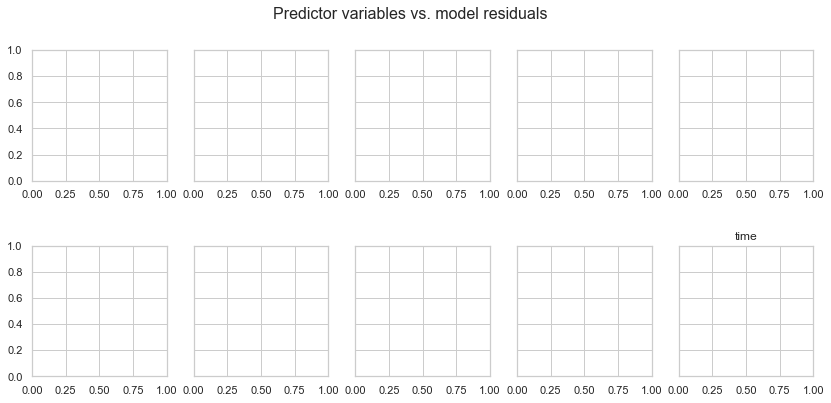

In [37]:
# checking for independence
fig, axs = plt.subplots(2,5, figsize=(14,6),sharey=True)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
fig.suptitle('Predictor variables vs. model residuals', fontsize=16)
axs = axs.ravel()

for index, column in enumerate(df2_non_corr.columns):
    axs[index-1].set_title("{}".format(column),fontsize=12)
    axs[index-1].scatter(x=df2_non_corr[column],y=fitted.resid,color='blue',edgecolor='k')
    axs[index-1].grid(True)
    xmin = min(df2_non_corr[column])
    xmax = max(df2_non_corr[column])
    axs[index-1].hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
    if index == 1 or index == 6:
        axs[index-1].set_ylabel('Residuals')


there is obvious clustering in most of the predictor variables which i a clear indication of high dependency

__. checking for normality__

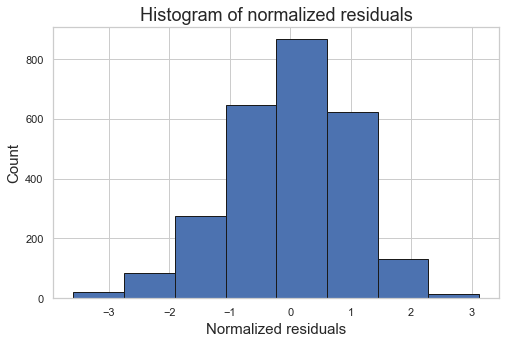

In [62]:
#histogram of normalized residuals
plt.figure(figsize=(8,5))
plt.hist(fitted.resid_pearson,bins=8,edgecolor='k')
plt.ylabel('Count',fontsize=15)
plt.xlabel('Normalized residuals',fontsize=15)
plt.title("Histogram of normalized residuals",fontsize=18)
plt.show()

In [ ]:
the normalizedrsiduals are approximately normal

__. QQ plots of the residuals__

In [64]:
from statsmodels.graphics.gofplots import qqplot

<Figure size 576x360 with 0 Axes>

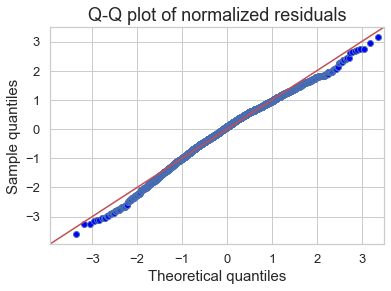

In [65]:
plt.figure(figsize=(8,5))
fig=qqplot(fitted.resid_pearson,line='45',fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles",fontsize=15)
plt.ylabel("Sample quantiles",fontsize=15)
plt.title("Q-Q plot of normalized residuals",fontsize=18)
plt.grid(True)
plt.show()

judging only from the two checks above, the residuals do appear to be normally distributed.

### 5.3 Fitting a standardized and regularized linear regression model

Regularisation offers an alternative method to the variable selection selection performed above. With regularisation the intention to scale each feature by how much it affects. There is a penality on those individual coefficients that get too large (those that contribute the most to reducing the fit).


We will now offer an alternative model. Where ther is no descrete model selection as above but a model that is achieved through ridge regression

In [28]:
df_no_missing.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Barcelona_pressure,Madrid_rain_1h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,1036.333333,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,1037.333333,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,1038.000000,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,1037.000000,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,1035.000000,0.0,800.0,800.0,1035.333333,800.0,1012.051407,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


#### Scaling with **Z-score standardisation** 

We have to scale the variables beofre we can regularise the data frame. The reason to scale the variables is to ensure that the regularisation term regularises(affects) the variables involved in the same manner. If the variables have significantly different scales regularising on these variables would be illogical.

In [29]:
# split predictors and response
X = df_no_missing.drop(['load_shortfall_3h','time','Valencia_wind_deg', 'Seville_pressure'], axis=1)
y = df_no_missing['load_shortfall_3h']

In [30]:
# Import scaler method from sklearn
from sklearn.preprocessing import StandardScaler

In [31]:
# Create scaler object
scaler = StandardScaler()

In [32]:
# Create scaled version of the predictors (there is no need to scale the response)
X_scaled = scaler.fit_transform(X)

In [33]:
# Convert the scaled predictor values into a dataframe
X_standardise = pd.DataFrame(X_scaled,columns=X.columns)
X_standardise.head()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Barcelona_pressure,Madrid_rain_1h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,-0.950708,-0.362123,-0.796169,0.516117,0.270621,-1.335491,-0.501451,-0.565065,0.630823,1.932284,-1.660205,-0.694188,0.542975,-0.203099,-0.224278,-0.024277,-0.247776,0.342424,0.385993,1.718219,0.352274,-1.129531e+00,-2.616796,-1.756232,-2.835227,-2.890888,0.649842,-2.490266,0.540928,-2.892663,-1.394813,-2.420380,-1.354598,-2.338357,-2.505658,-1.218309,-2.621665,-2.125118,-2.405393,-2.309892
1,-1.130863,-0.362123,-0.381412,0.692953,0.298017,-1.335491,-0.501451,-0.565065,0.607959,0.630270,-0.578686,-0.694188,0.542975,-0.203099,-0.224278,-0.024206,-0.247776,0.342424,0.385993,1.784583,0.352274,-9.289340e-01,-2.539014,-1.696165,-2.591966,-2.633926,0.649842,-2.403108,0.298645,-2.626219,-1.456868,-2.374370,-1.423738,-2.183645,-2.353511,-1.292271,-2.475661,-2.040702,-2.357388,-2.261154
2,-0.770554,-0.362123,-0.657917,0.383491,0.284319,-1.335491,-0.501451,-0.565065,0.542632,-0.485743,1.520733,-0.694188,0.144442,-0.203099,-0.224278,-0.024158,-0.247776,0.342424,0.385993,1.817765,0.352274,-8.085757e-01,-2.105564,-1.636097,-1.761812,-1.757012,0.649842,-1.917409,0.021750,-1.716949,-1.316350,-1.726058,-1.267176,-1.489980,-1.671342,-1.124792,-1.821036,-1.570279,-1.680968,-1.574407
3,-0.770554,-0.362123,-0.657917,0.118238,-0.044439,-1.335491,-0.501451,-0.565065,0.398912,-0.299741,0.925711,-0.694188,0.941509,-0.203099,-0.224278,-0.024229,-0.247776,0.342424,0.385993,1.817765,0.352274,-3.672620e-01,-1.361703,-0.705052,-0.850953,-0.794849,0.649842,-1.083879,-0.583957,-0.719283,-1.061929,-0.783992,-0.983703,-0.579082,-0.775541,-0.821553,-0.961406,-0.762967,-0.698057,-0.576488
4,-0.770554,-0.362123,-0.657917,-0.161751,-0.017043,-1.274045,-0.894581,-0.565065,0.255192,0.816272,0.779762,-0.694188,0.343708,-0.203099,-0.224278,-0.024372,-0.247776,0.342424,0.385993,1.751401,0.352274,2.736630e-13,-1.348214,1.127003,-1.100044,-1.057970,0.649842,-1.068764,-0.358980,-0.992113,-0.954814,-0.908771,-0.864356,-0.412497,-0.611717,-0.693885,-0.804197,-0.748327,-0.828246,-0.708665


#### Ridge Regression

In [34]:
# Import train/test splitting function from sklearn
from sklearn.model_selection import train_test_split

In [35]:
# Split the data into train and test, being sure to use the standardised predictors
X_train, X_test, y_train, y_test = train_test_split(X_standardise, 
                                                    y, 
                                                    test_size=0.2, 
                                                    shuffle=False)

In [36]:
# Import the ridge regression module from sklearn
from sklearn.linear_model import Ridge

In [37]:
# Create ridge model
ridge = Ridge()

In [38]:
# Train the model
ridge.fit(X_train, y_train)

Ridge()

In [39]:
# Extract the model intercept value
b0 = float(ridge.intercept_)

In [40]:
# Extract the model coefficient value
coeff = pd.DataFrame(ridge.coef_, X.columns, columns=['Coefficient'])

In [41]:
print("Intercept:", float(b0))

Intercept: 10530.006548650243


In [42]:
# Check out the coefficients
coeff

,Coefficient
Madrid_wind_speed,-461.765916
Bilbao_rain_1h,-120.067238
Valencia_wind_speed,-149.802105
Seville_humidity,-927.265469
Madrid_humidity,15.427088
Bilbao_clouds_all,-168.246747
Bilbao_wind_speed,-57.109798
Seville_clouds_all,68.625637
Bilbao_wind_deg,-379.752723
Barcelona_wind_speed,-164.097605


__*Predictive accuracy of the  model*__ 

In [43]:
# Import metrics module
from sklearn import metrics

In [49]:
train_ridge = ridge.predict(X_train)

In [55]:
print('Ridge Train MSE:', round(metrics.mean_squared_error(y_train, train_ridge)))

Ridge Train MSE: 23333679


In [51]:
test_ridge = ridge.predict(X_test)

In [58]:
print('Ridge train MS :', round(metrics.mean_squared_error(y_test, test_ridge)))

Ridge train MS : 23431943


### 5.4. Building a Random Forest Regression Model

In [110]:
# create one or more ML models

In [111]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [112]:
# Compare model performance

In [113]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [114]:
# discuss chosen methods logic